In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')


Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'amazon.csv'

In [ ]:
data.head()

In [ ]:
data.info()

In [2]:
data.describe()

NameError: name 'data' is not defined

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [4]:
# Load the dataset from the CSV file
df = pd.read_csv('amazon.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'amazon.csv'

In [ ]:
# Perform minimal text cleaning (e.g., lowercase)
df['body'] = df['body'].str.lower()


In [5]:
# Encode sentiment labels (1 for positive, 0 for negative, for example)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])


NameError: name 'df' is not defined

In [6]:
# Split the dataset into training and testing sets
X = df['body']  # Features (review text)
y = df['sentiment']  # Target variable (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'df' is not defined

In [7]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


NameError: name 'X_train' is not defined

In [8]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(chi2, k=1000)

# Fit and transform the feature selector on the training data
X_train_chi2 = k_best.fit_transform(X_train_tfidf, y_train)

# Transform the test data as well
X_test_chi2 = k_best.transform(X_test_tfidf)
# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Map the selected indices back to the TF-IDF feature names if you have them
selected_feature_names = [tfidf_vectorizer.get_feature_names_out()[i] for i in selected_feature_indices]

# Print the selected feature names
print(selected_feature_names)


NameError: name 'X_train_tfidf' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the feature set and labels
X_resampled, y_resampled = smote.fit_resample(X_train_chi2, y_train)

# Now, X_resampled and y_resampled contain the balanced dataset


In [ ]:
import numpy as np

# Assuming y_resampled contains the balanced labels
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Display the counts for each class
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} samples")


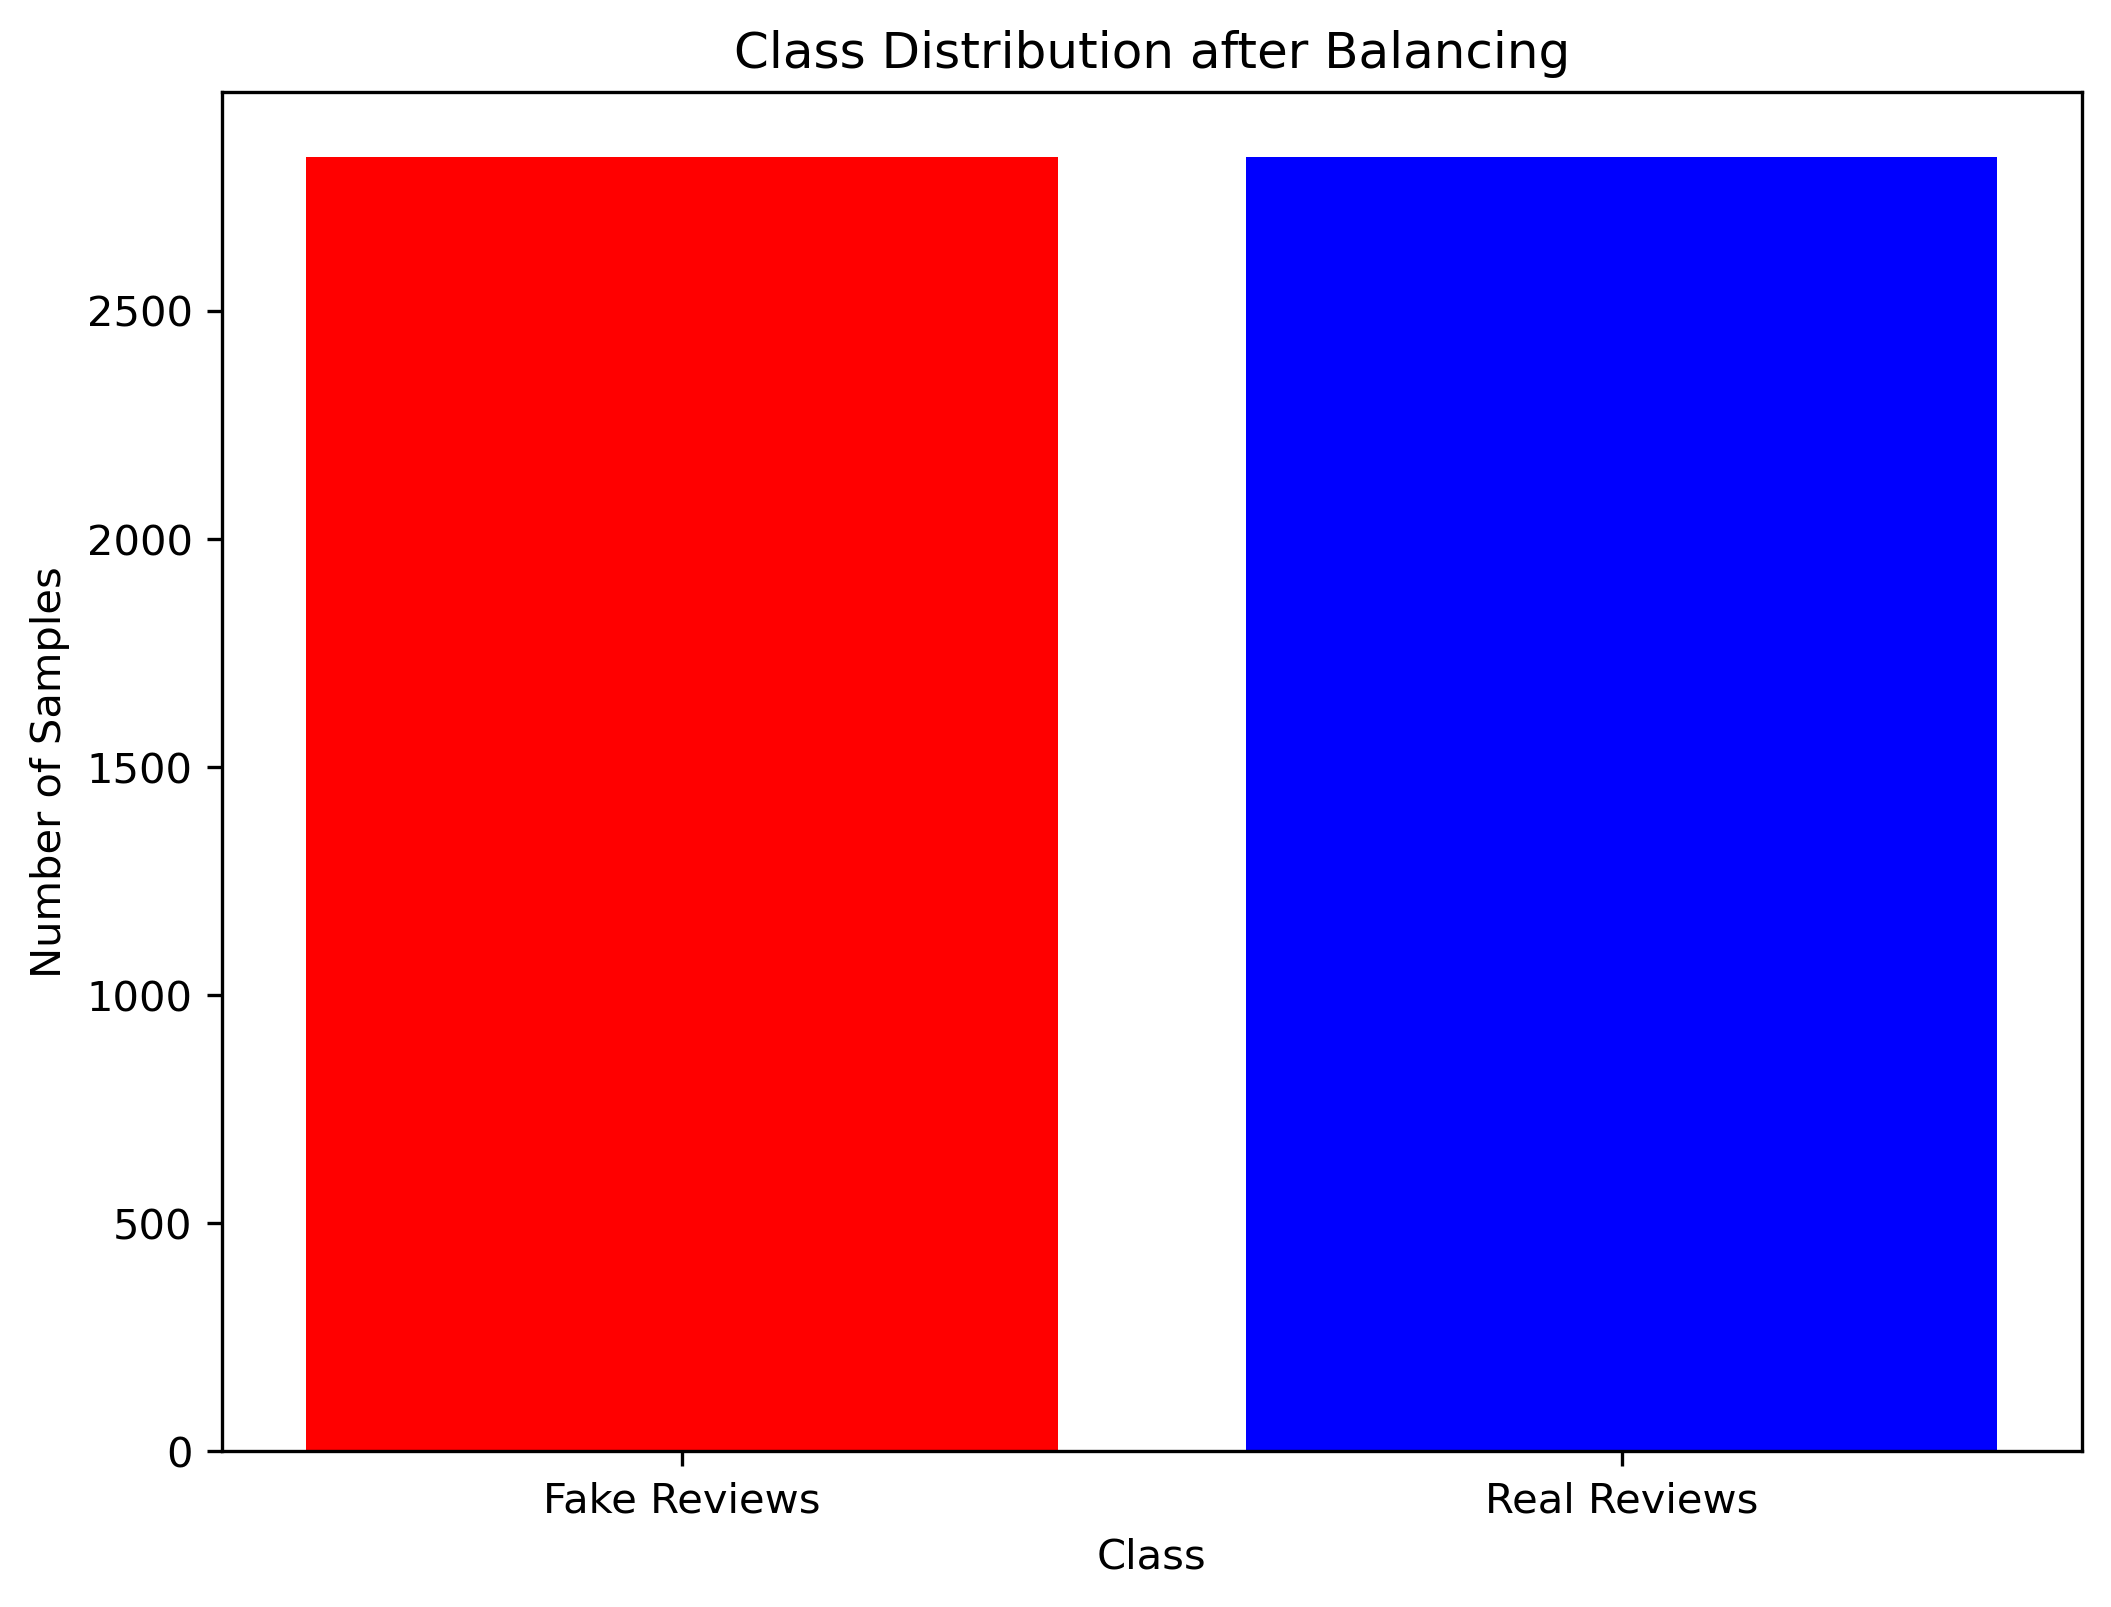

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_resampled contains the balanced labels
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Define class labels for the plot
class_labels = ["Fake Reviews", "Real Reviews"]

# Create a bar plot
plt.figure(figsize=(8, 6), dpi  = 300)
plt.bar(class_labels, class_counts, color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after Balancing')
plt.show()


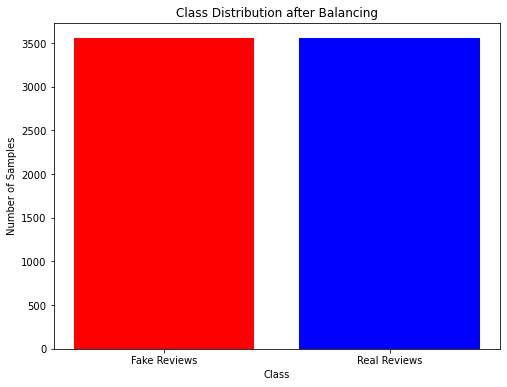

Scaled dataset saved to 'amazon_scaled.csv'.


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load your dataset, assuming it's in 'amazon.csv'
# df = pd.read_csv('amazon.csv')

# Assuming 'rating' and 'body' are your features, and 'sentiment' is the target variable
X_text = df['body']
X_numeric = df['rating']
y = df['sentiment']

# Preprocess text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Combine text and numeric features
X_combined = np.column_stack((X_numeric, X_text_tfidf.toarray()))

# Feature selection using Chi-Square
k_best = SelectKBest(score_func=chi2, k='all')
X_new = k_best.fit_transform(X_combined, y)

# Assuming you want to keep the top 'n' features based on their Chi-Square scores
# Replace 'n' with the desired number of features you want to keep
n = 2
top_features_indices = np.argsort(k_best.scores_)[-n:]
X_selected = X_new[:, top_features_indices]

# Balance the class distribution using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Generate column names for the scaled data
column_names = [f"feature_{i+1}" for i in range(X_scaled.shape[1])]

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(X_scaled, columns=column_names)
scaled_df['sentiment'] = y_resampled

# Plot the class distribution after balancing
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)
class_labels = ["Fake Reviews", "Real Reviews"]

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after Balancing')
plt.show()

# Save the scaled dataset to a CSV file
scaled_df.to_csv('amazon_scaled.csv', index=False)

print("Scaled dataset saved to 'amazon_scaled.csv'.")


# KNN

C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.49
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


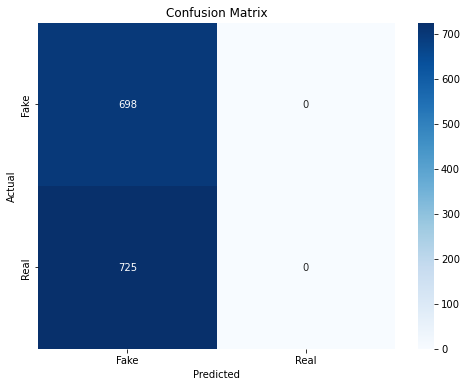

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled dataset
scaled_df = pd.read_csv('amazon_scaled.csv')

# Split the dataset into features (X) and target (y)
X = scaled_df.drop(columns=['sentiment'])
y = scaled_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with 'k' neighbors (you can adjust 'k' as needed)
# Experiment with different values of 'k' to find the best one
k = 10  # Adjust 'k' as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a Seaborn confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define a range of 'k' values to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best 'k' value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best 'k' value
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN classifier with the best 'k'
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions and calculate metrics with the best 'k'
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best 'k': {best_k}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Best 'k': 3
Accuracy: 0.52
Precision: 0.51
Recall: 1.00
F1 Score: 0.68


Best 'k': 3
Accuracy: 0.52
Precision: 0.51
Recall: 1.00
F1 Score: 0.68


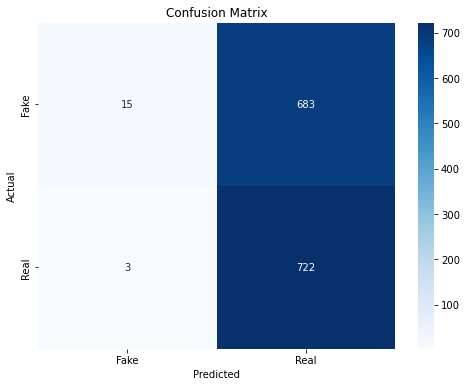

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled dataset
scaled_df = pd.read_csv('amazon_scaled.csv')

# Split the dataset into features (X) and target (y)
X = scaled_df.drop(columns=['sentiment'])
y = scaled_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Hyperparameter Tuning using Grid Search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

# Step 2: Train the KNN classifier with the best 'k'
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Step 3: Make predictions and calculate metrics with the best 'k'
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best 'k': {best_k}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 4: Create a Seaborn confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.52
Precision: 0.51
Recall: 0.99
F1 Score: 0.68


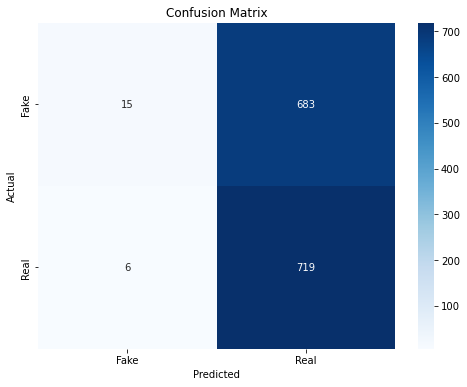

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled dataset
scaled_df = pd.read_csv('amazon_scaled.csv')

# Split the dataset into features (X) and target (y)
X = scaled_df.drop(columns=['sentiment'])
y = scaled_df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_reg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a Seaborn confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Initialize the KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train_chi2, y_train)

# Use the trained KNN classifier to make predictions on the test data
y_pred = knn_classifier.predict(X_test_chi2)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the accuracy
print("Accuracy:", accuracy)


Confusion Matrix:
[[  0  66]
 [  1 718]]
Accuracy: 0.9146496815286624


In [ ]:

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Visualize features with sentiment using pairplot
sns.pairplot(data, hue='sentiment', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Plot of Features with Sentiment Labels", y=1.02)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


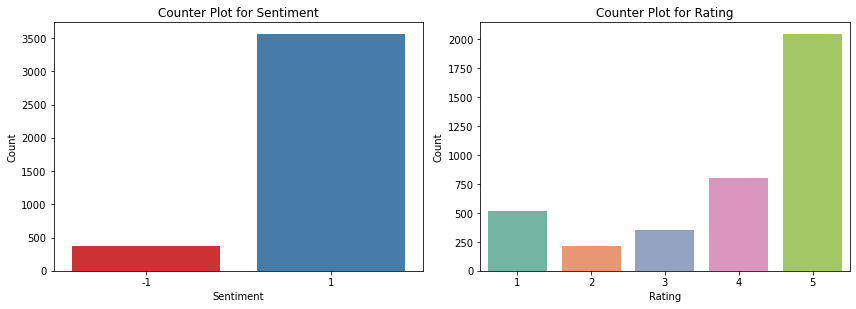

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Plot counter plots for sentiment and other categorical features
plt.figure(figsize=(12, 8))

# Counter plot for Sentiment
plt.subplot(2, 2, 1)
sns.countplot(data['sentiment'], palette='Set1')
plt.title("Counter Plot for Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Counter plot for Rating
plt.subplot(2, 2, 2)
sns.countplot(data['rating'], palette='Set2')
plt.title("Counter Plot for Rating")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


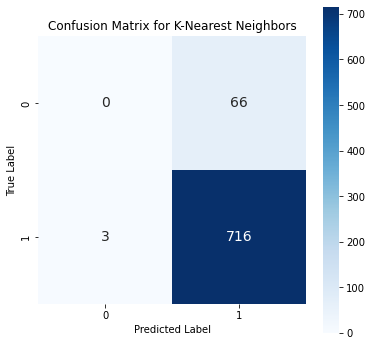

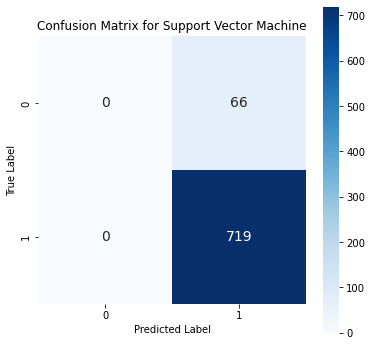

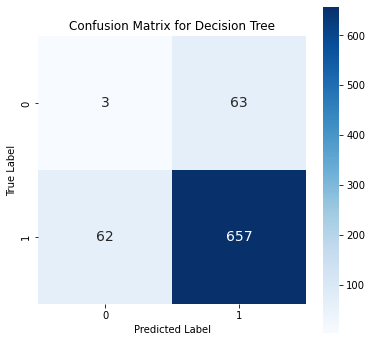

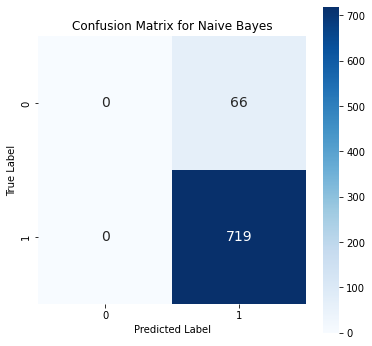

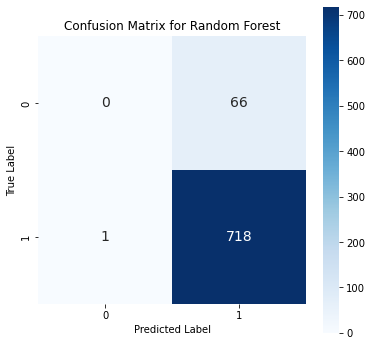

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),  # No PCA for Naive Bayes
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Step 7: Plot decision boundaries (same as before)

    # Step 8: Plot confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, annot_kws={'size': 14})
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
# You can perform various text preprocessing steps here, like removing special characters,
# converting to lowercase, removing stop words, and tokenization. For simplicity, let's just
# convert the text to lowercase.
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Evaluate the performance of the KNN classifier
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9121019108280255
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        66
           1       0.92      1.00      0.95       719

    accuracy                           0.91       785
   macro avg       0.46      0.50      0.48       785
weighted avg       0.84      0.91      0.87       785



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Step 6: Evaluate the performance of the SVM classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9159235668789809
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        66
           1       0.92      1.00      0.96       719

    accuracy                           0.92       785
   macro avg       0.46      0.50      0.48       785
weighted avg       0.84      0.92      0.88       785



C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Step 6: Evaluate the performance of the Decision Tree classifier
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8522292993630574
              precision    recall  f1-score   support

          -1       0.04      0.03      0.03        66
           1       0.91      0.93      0.92       719

    accuracy                           0.85       785
   macro avg       0.47      0.48      0.48       785
weighted avg       0.84      0.85      0.85       785



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 6: Evaluate the performance of the Naive Bayes classifier
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9159235668789809
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        66
           1       0.92      1.00      0.96       719

    accuracy                           0.92       785
   macro avg       0.46      0.50      0.48       785
weighted avg       0.84      0.92      0.88       785



C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProBook\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Evaluate the performance of the Random Forest classifier
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9146496815286624
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        66
           1       0.92      1.00      0.96       719

    accuracy                           0.91       785
   macro avg       0.46      0.50      0.48       785
weighted avg       0.84      0.91      0.88       785



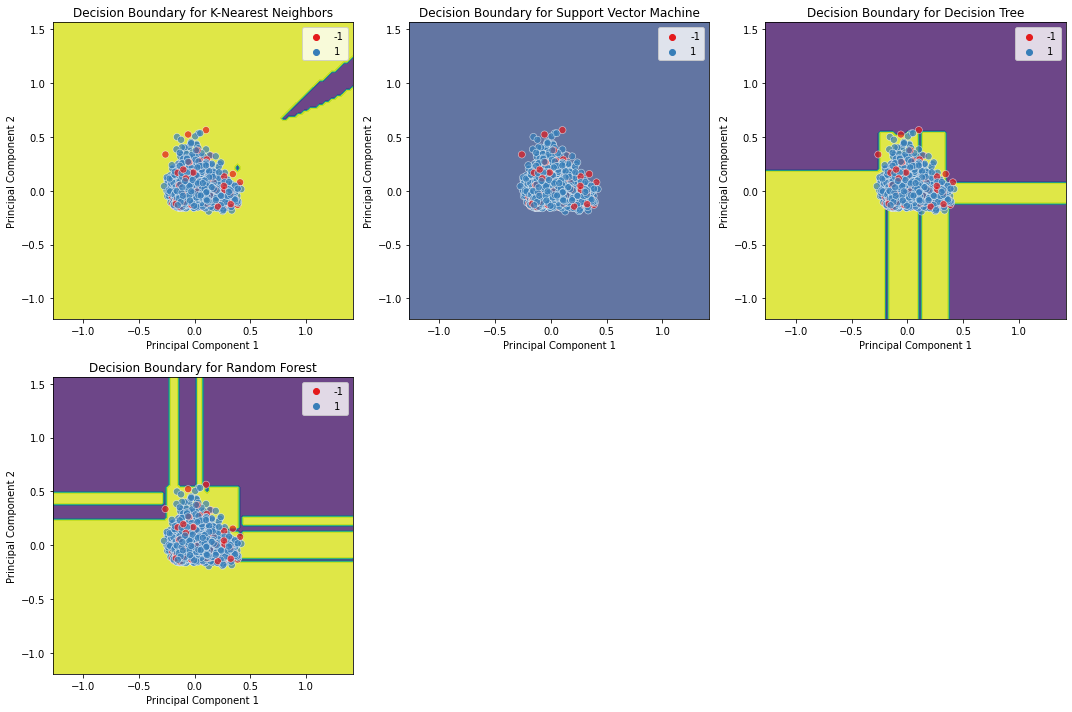

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('amazon.csv')

# Step 2: Text Preprocessing
data['body'] = data['body'].str.lower()

# Step 3: Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['body'])
y = data['sentiment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Create a meshgrid for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train.toarray())
xx, yy = np.meshgrid(np.linspace(X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1, 100),
                     np.linspace(X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1, 100))

# Plot decision boundaries for all models
plt.figure(figsize=(15, 10))

for idx, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_2D, y_train)

    plt.subplot(2, 3, idx + 1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette='Set1', s=50, alpha=0.7)
    plt.title(f"Decision Boundary for {clf_name}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()

plt.tight_layout()
plt.show()


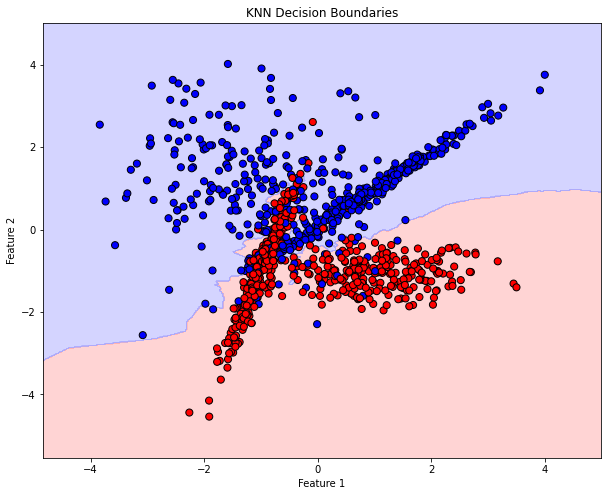

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()


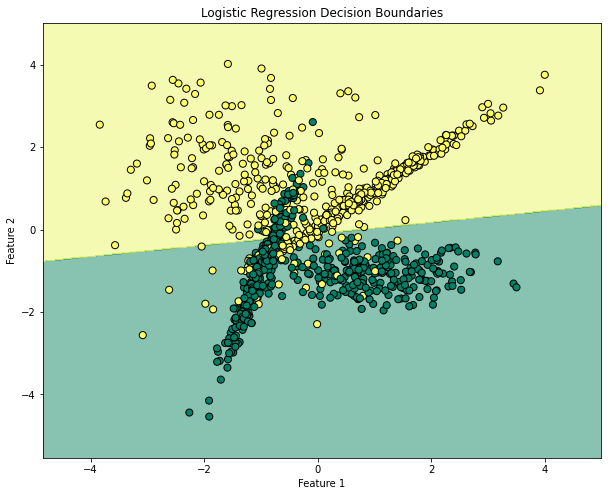

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create a Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X, y)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point in the mesh grid
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundaries')
plt.show()


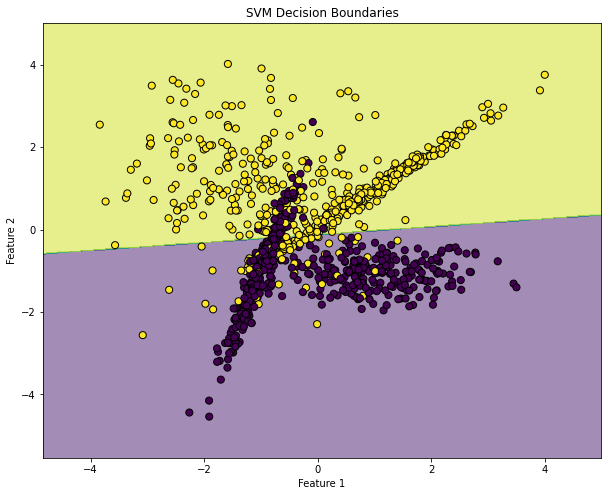

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X, y)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for each point in the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()


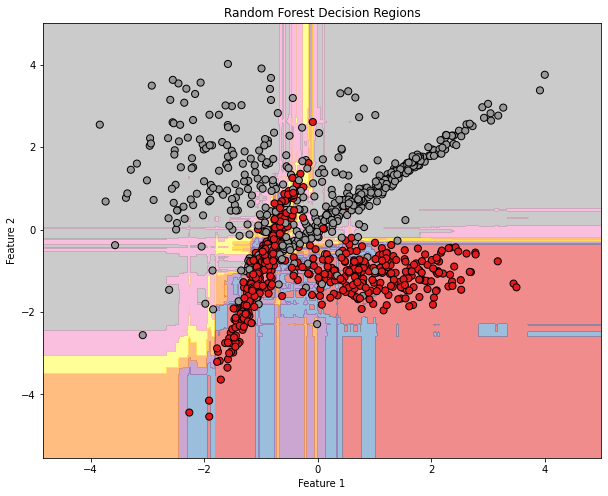

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create a mesh grid to plot the decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class probabilities for each point in the mesh grid
probs = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# Plot the decision regions and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, probs, cmap=plt.cm.Set1, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Regions')
plt.show()


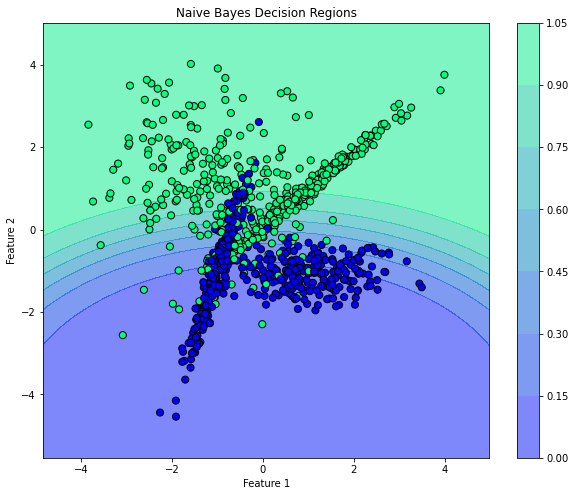

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X, y)

# Create a mesh grid to plot the decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class probabilities for each point in the mesh grid
probs = nb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# Plot the contour map of predicted probabilities
plt.figure(figsize=(10, 8))
contour = plt.contourf(xx, yy, probs, cmap=plt.cm.winter, alpha=0.5)
plt.colorbar(contour)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Regions')
plt.show()


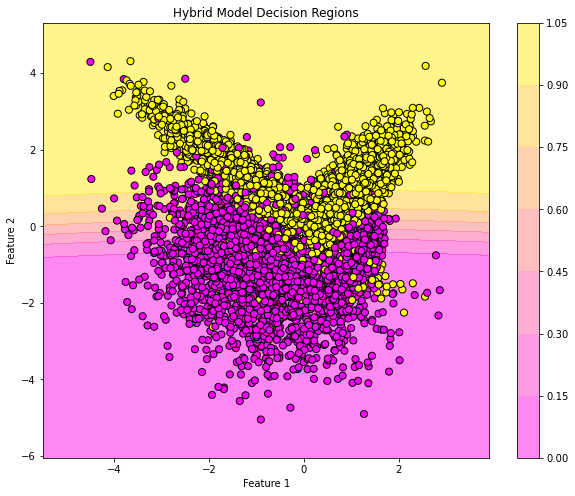

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate synthetic data for demonstration (replace with your own data)
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X, y)

# Create a mesh grid to plot the decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class probabilities for each point in the mesh grid
probs = nb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# Plot the contour map of predicted probabilities
plt.figure(figsize=(10, 8))
contour = plt.contourf(xx, yy, probs, cmap=plt.cm.spring, alpha=0.5)
plt.colorbar(contour)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hybrid Model Decision Regions')
plt.show()


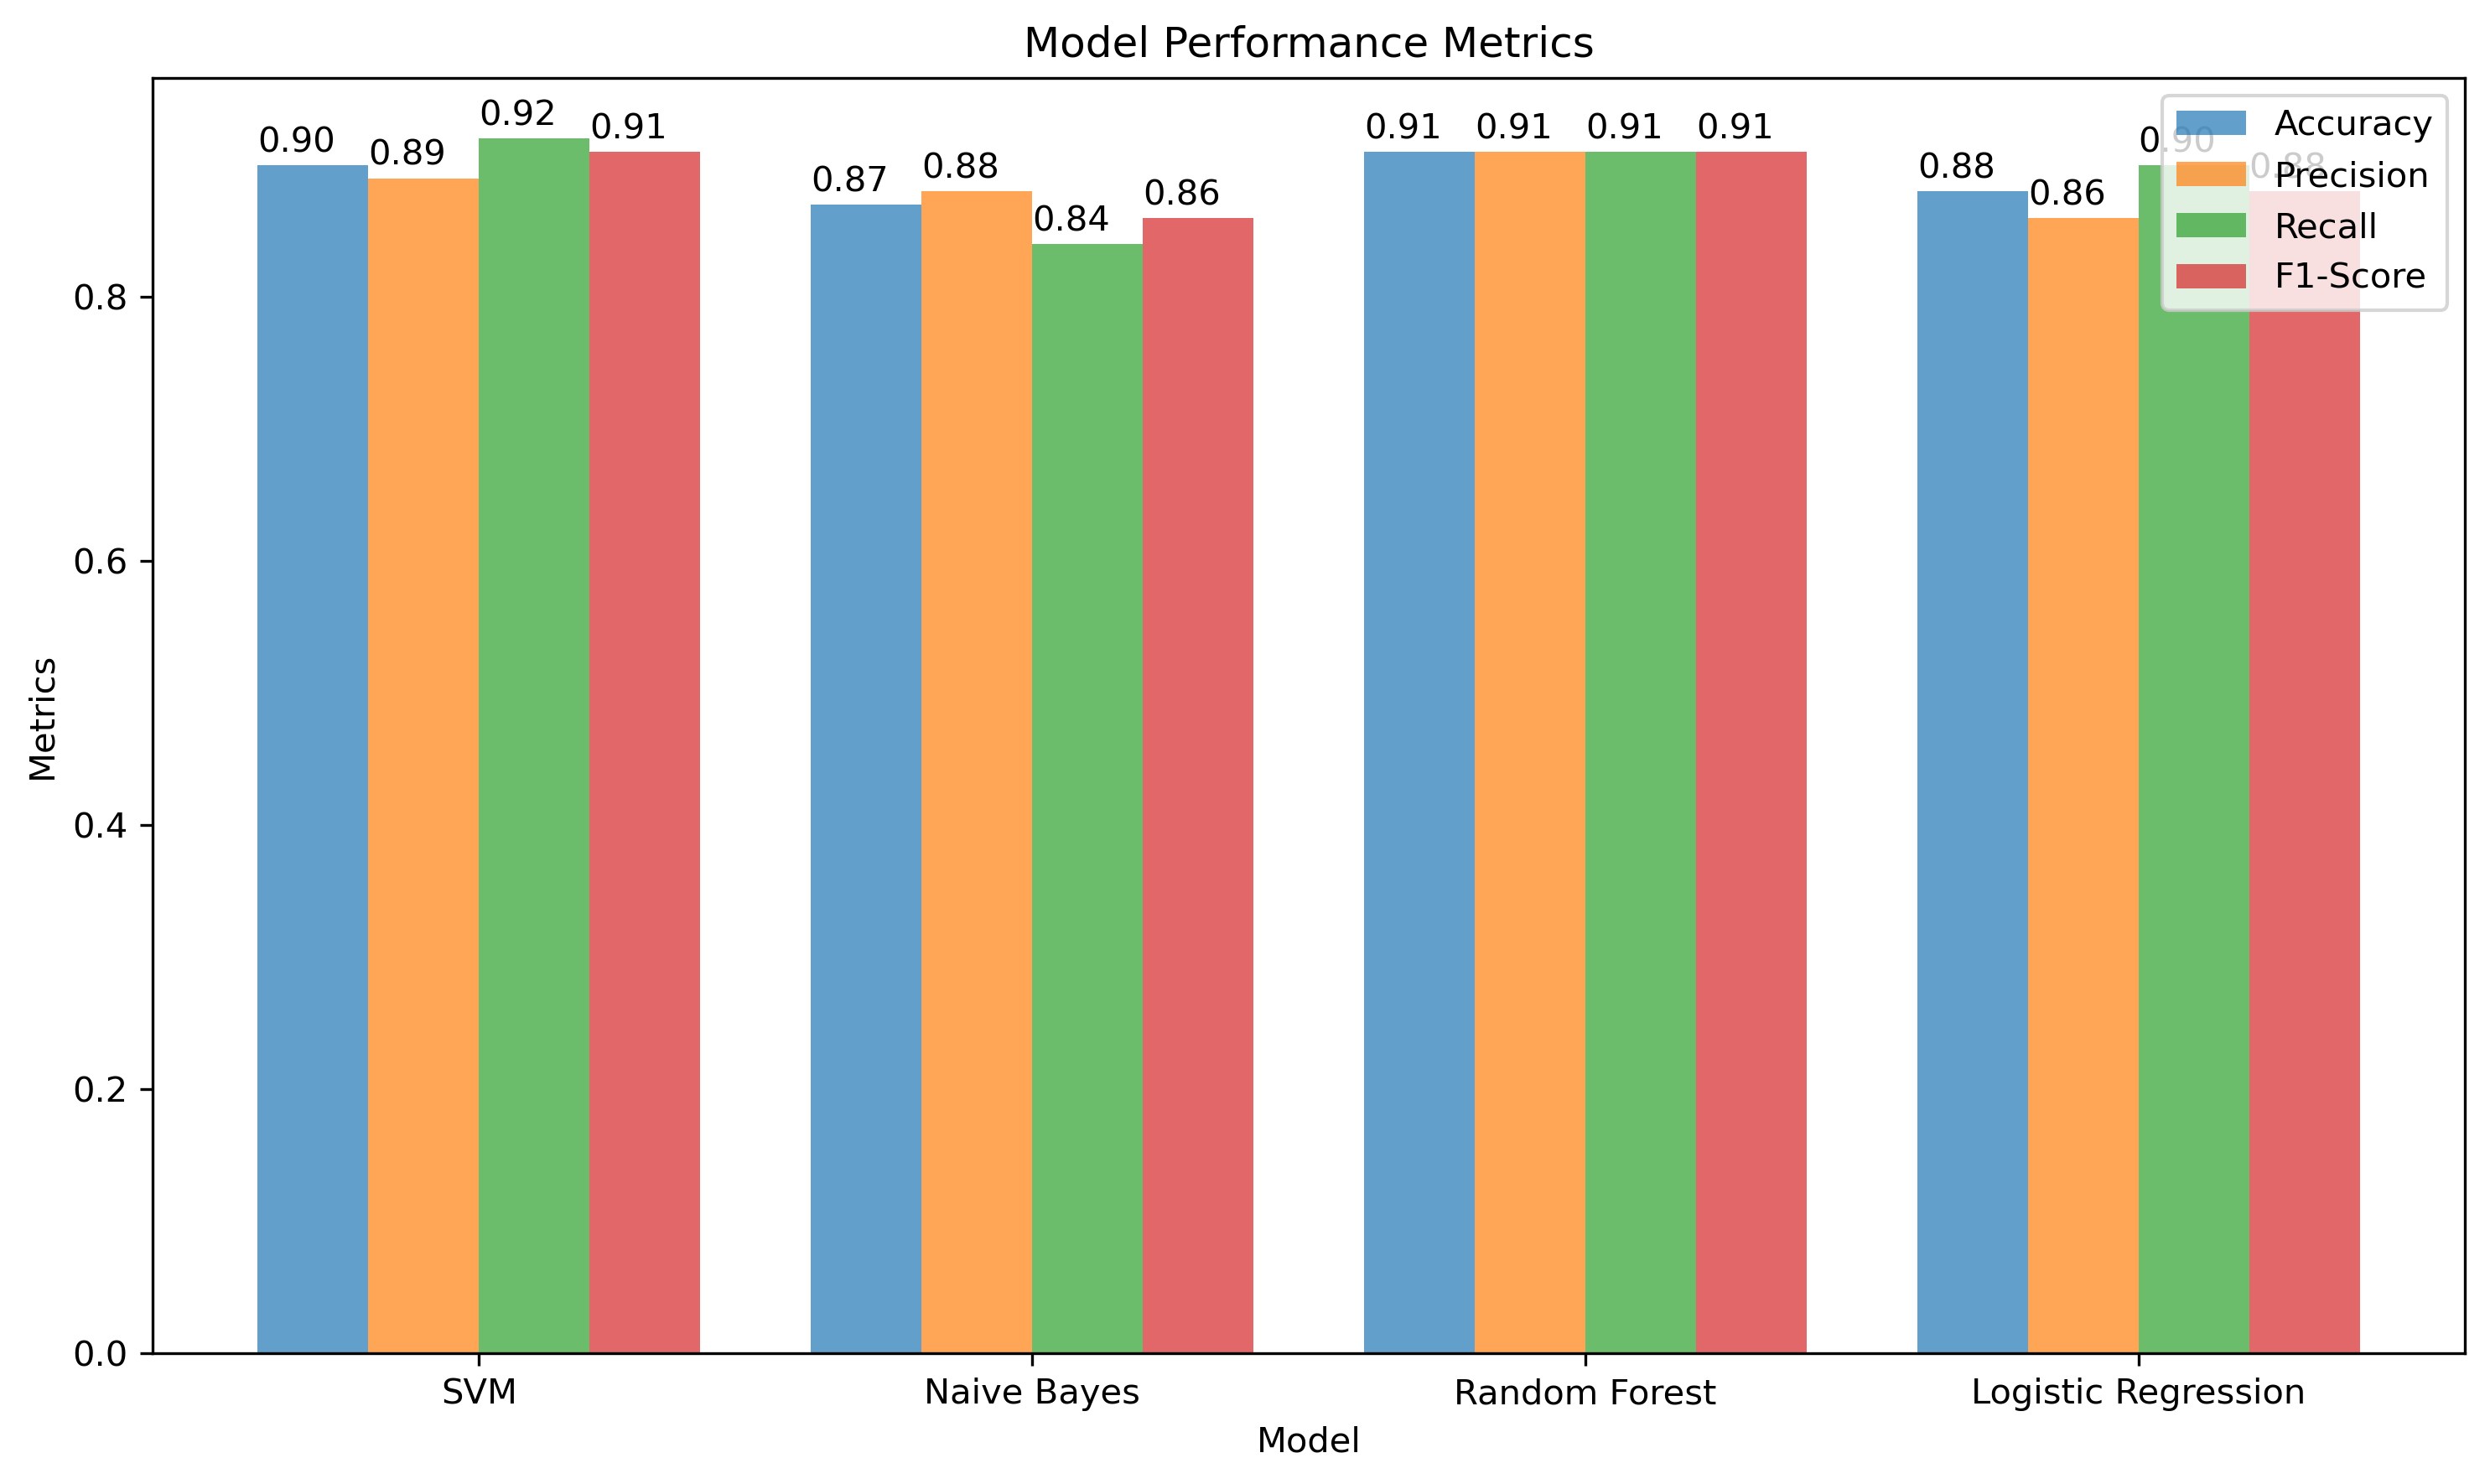

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and corresponding metric values
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [0.90, 0.87, 0.91, 0.88]
precision = [0.89, 0.88, 0.91, 0.86]
recall = [0.92, 0.84, 0.91, 0.90]
f1_score = [0.91, 0.86, 0.91, 0.88]

# Set the width of the bars
bar_width = 0.2

# Set the positions of bars on the x-axis
index = np.arange(len(models))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)

# Plot bars for each metric
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7)
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7)
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7)
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7)

# Set labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Model Performance Metrics')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()

# Annotate the bars with metric values
for i, v in enumerate(accuracy):
    ax.text(i - 0.1, v + 0.01, f'{v:.2f}', fontsize=10)
for i, v in enumerate(precision):
    ax.text(i + bar_width - 0.1, v + 0.01, f'{v:.2f}', fontsize=10)
for i, v in enumerate(recall):
    ax.text(i + 2 * bar_width - 0.1, v + 0.01, f'{v:.2f}', fontsize=10)
for i, v in enumerate(f1_score):
    ax.text(i + 3 * bar_width - 0.1, v + 0.01, f'{v:.2f}', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


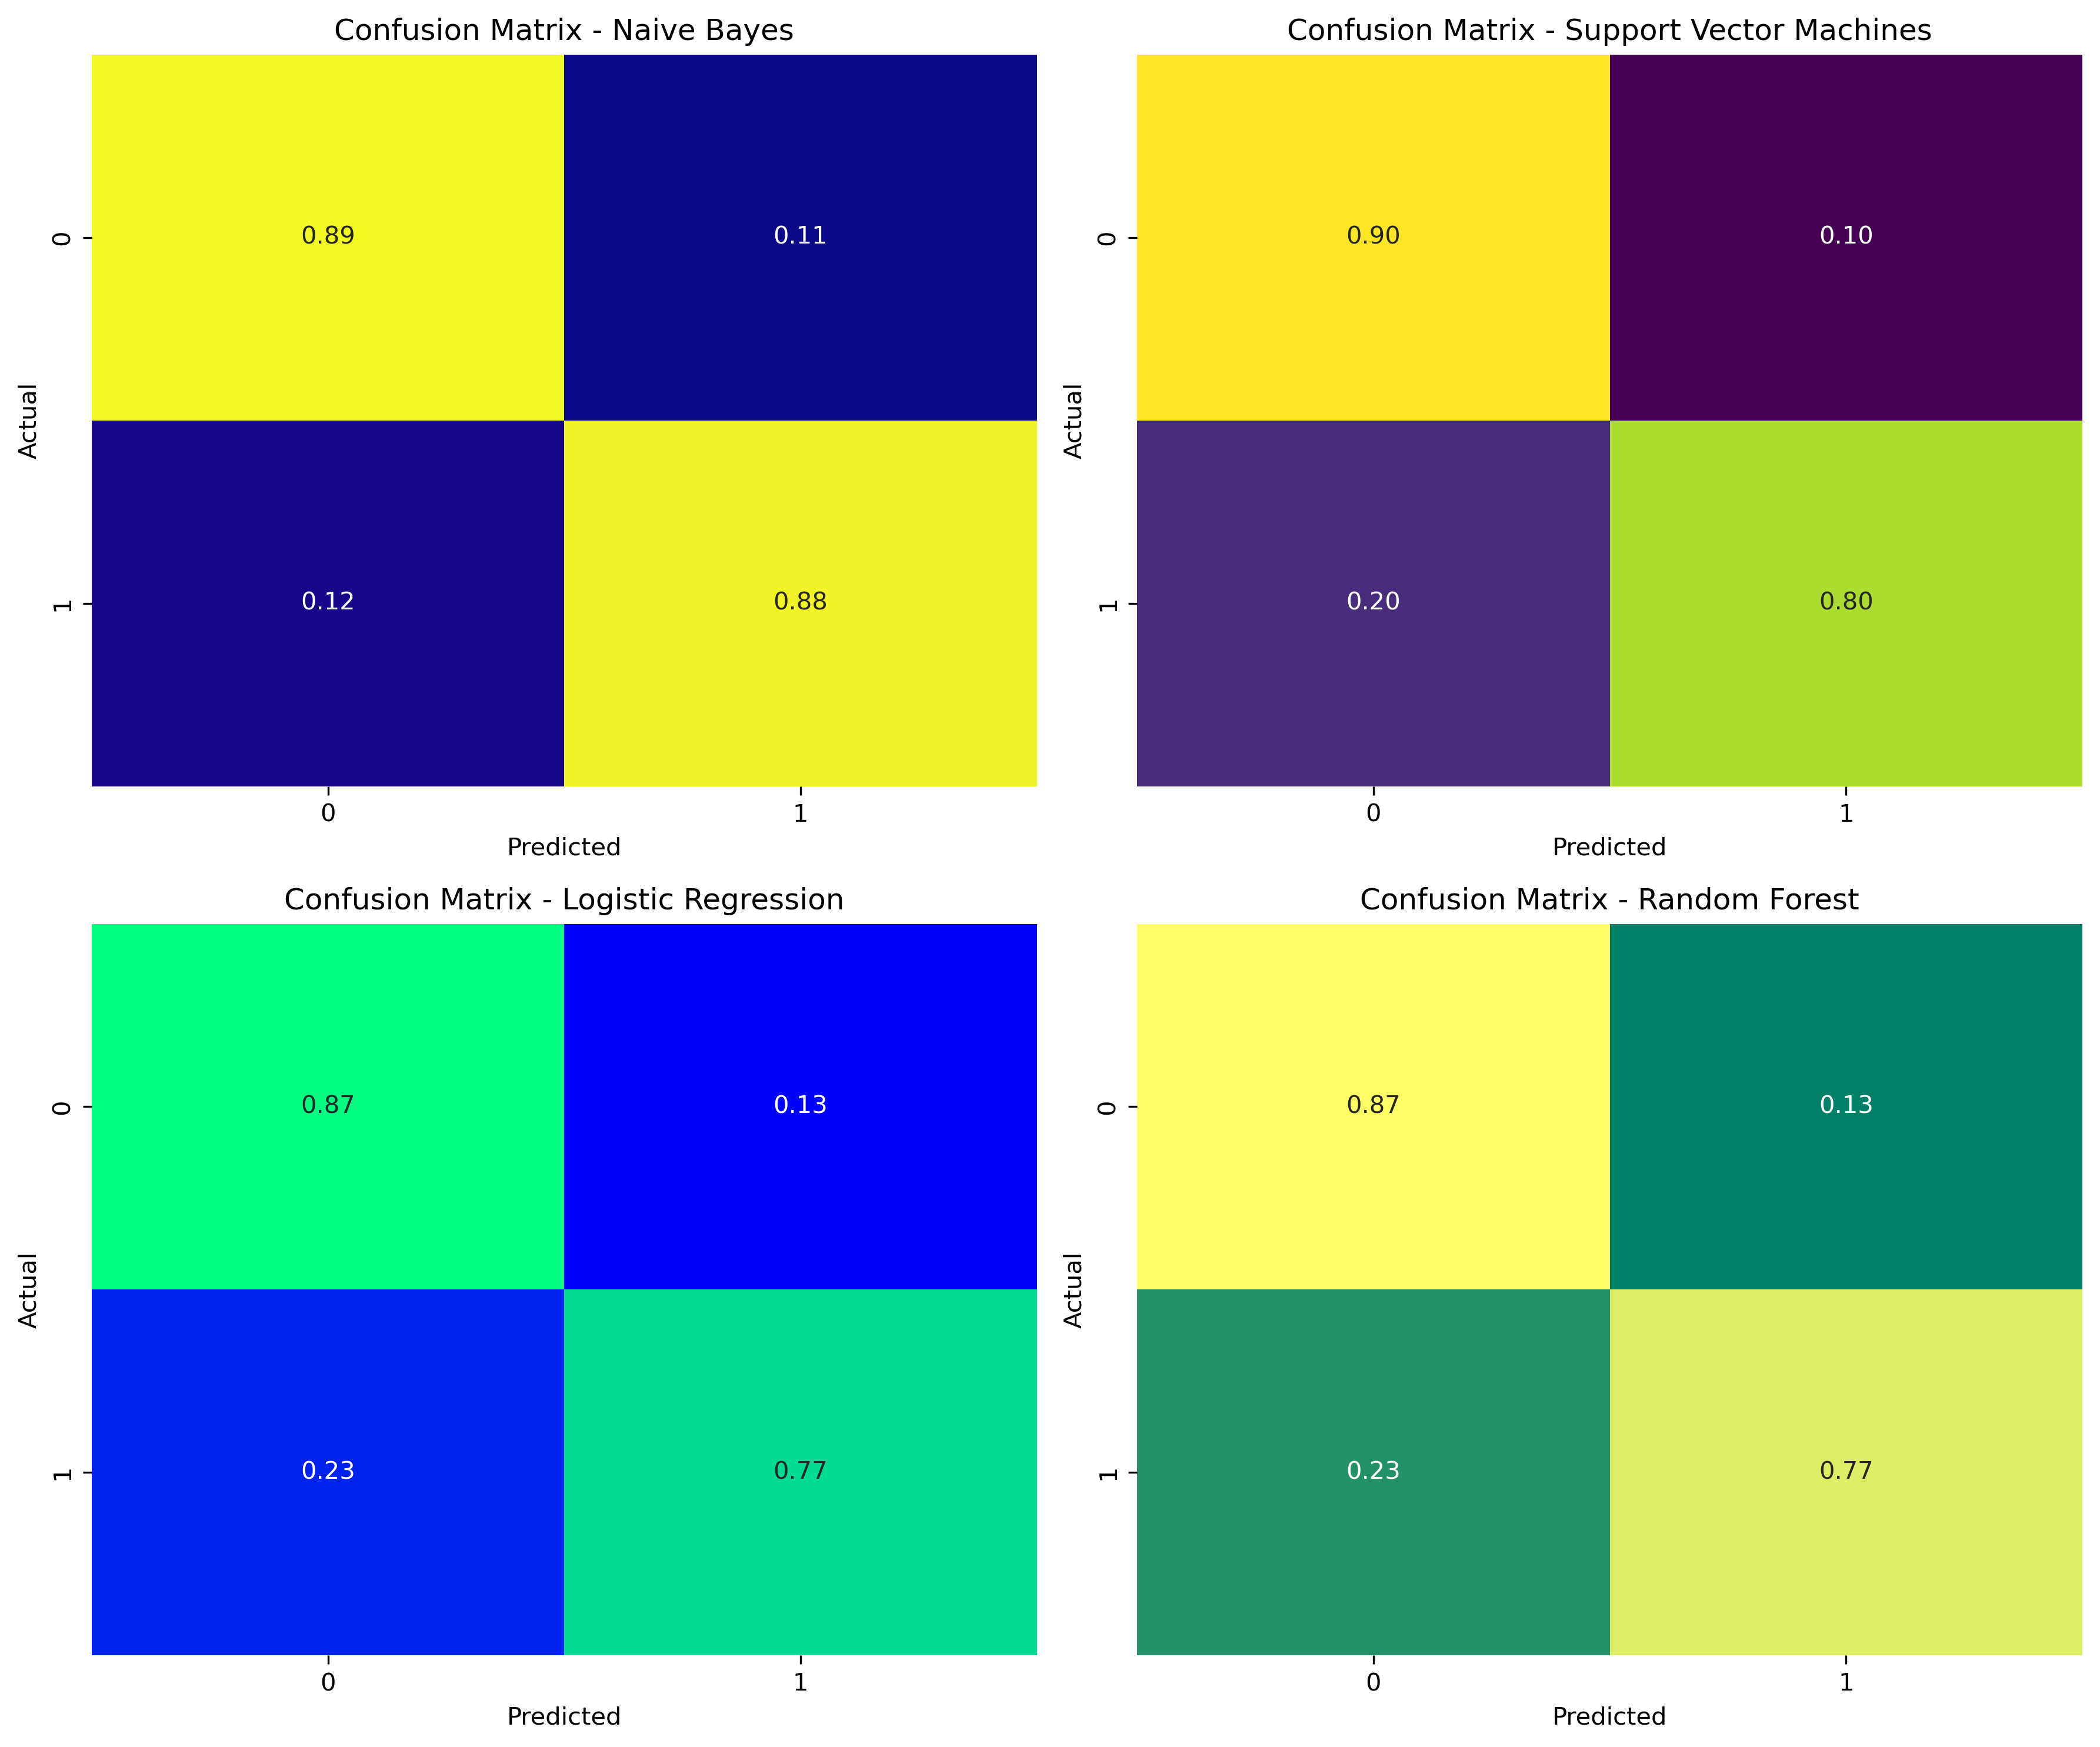

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each model
confusion_matrices = {
    'Naive Bayes': np.array([[0.89, 0.11], [0.12, 0.88]]),
    'Support Vector Machines': np.array([[0.90, 0.10], [0.20, 0.80]]),
    'Logistic Regression': np.array([[0.87, 0.13], [0.23, 0.77]]),
    'Random Forest': np.array([[0.87, 0.13], [0.23, 0.77]])
}

# Define the colormap for each confusion matrix
cmaps = ['plasma', 'viridis', 'winter', 'summer']

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi = 300)

# Loop through each model and plot the confusion matrix
for i, (model, cmap) in enumerate(zip(confusion_matrices.keys(), cmaps)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(confusion_matrices[model], annot=True, fmt=".2f", cmap=cmap, ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


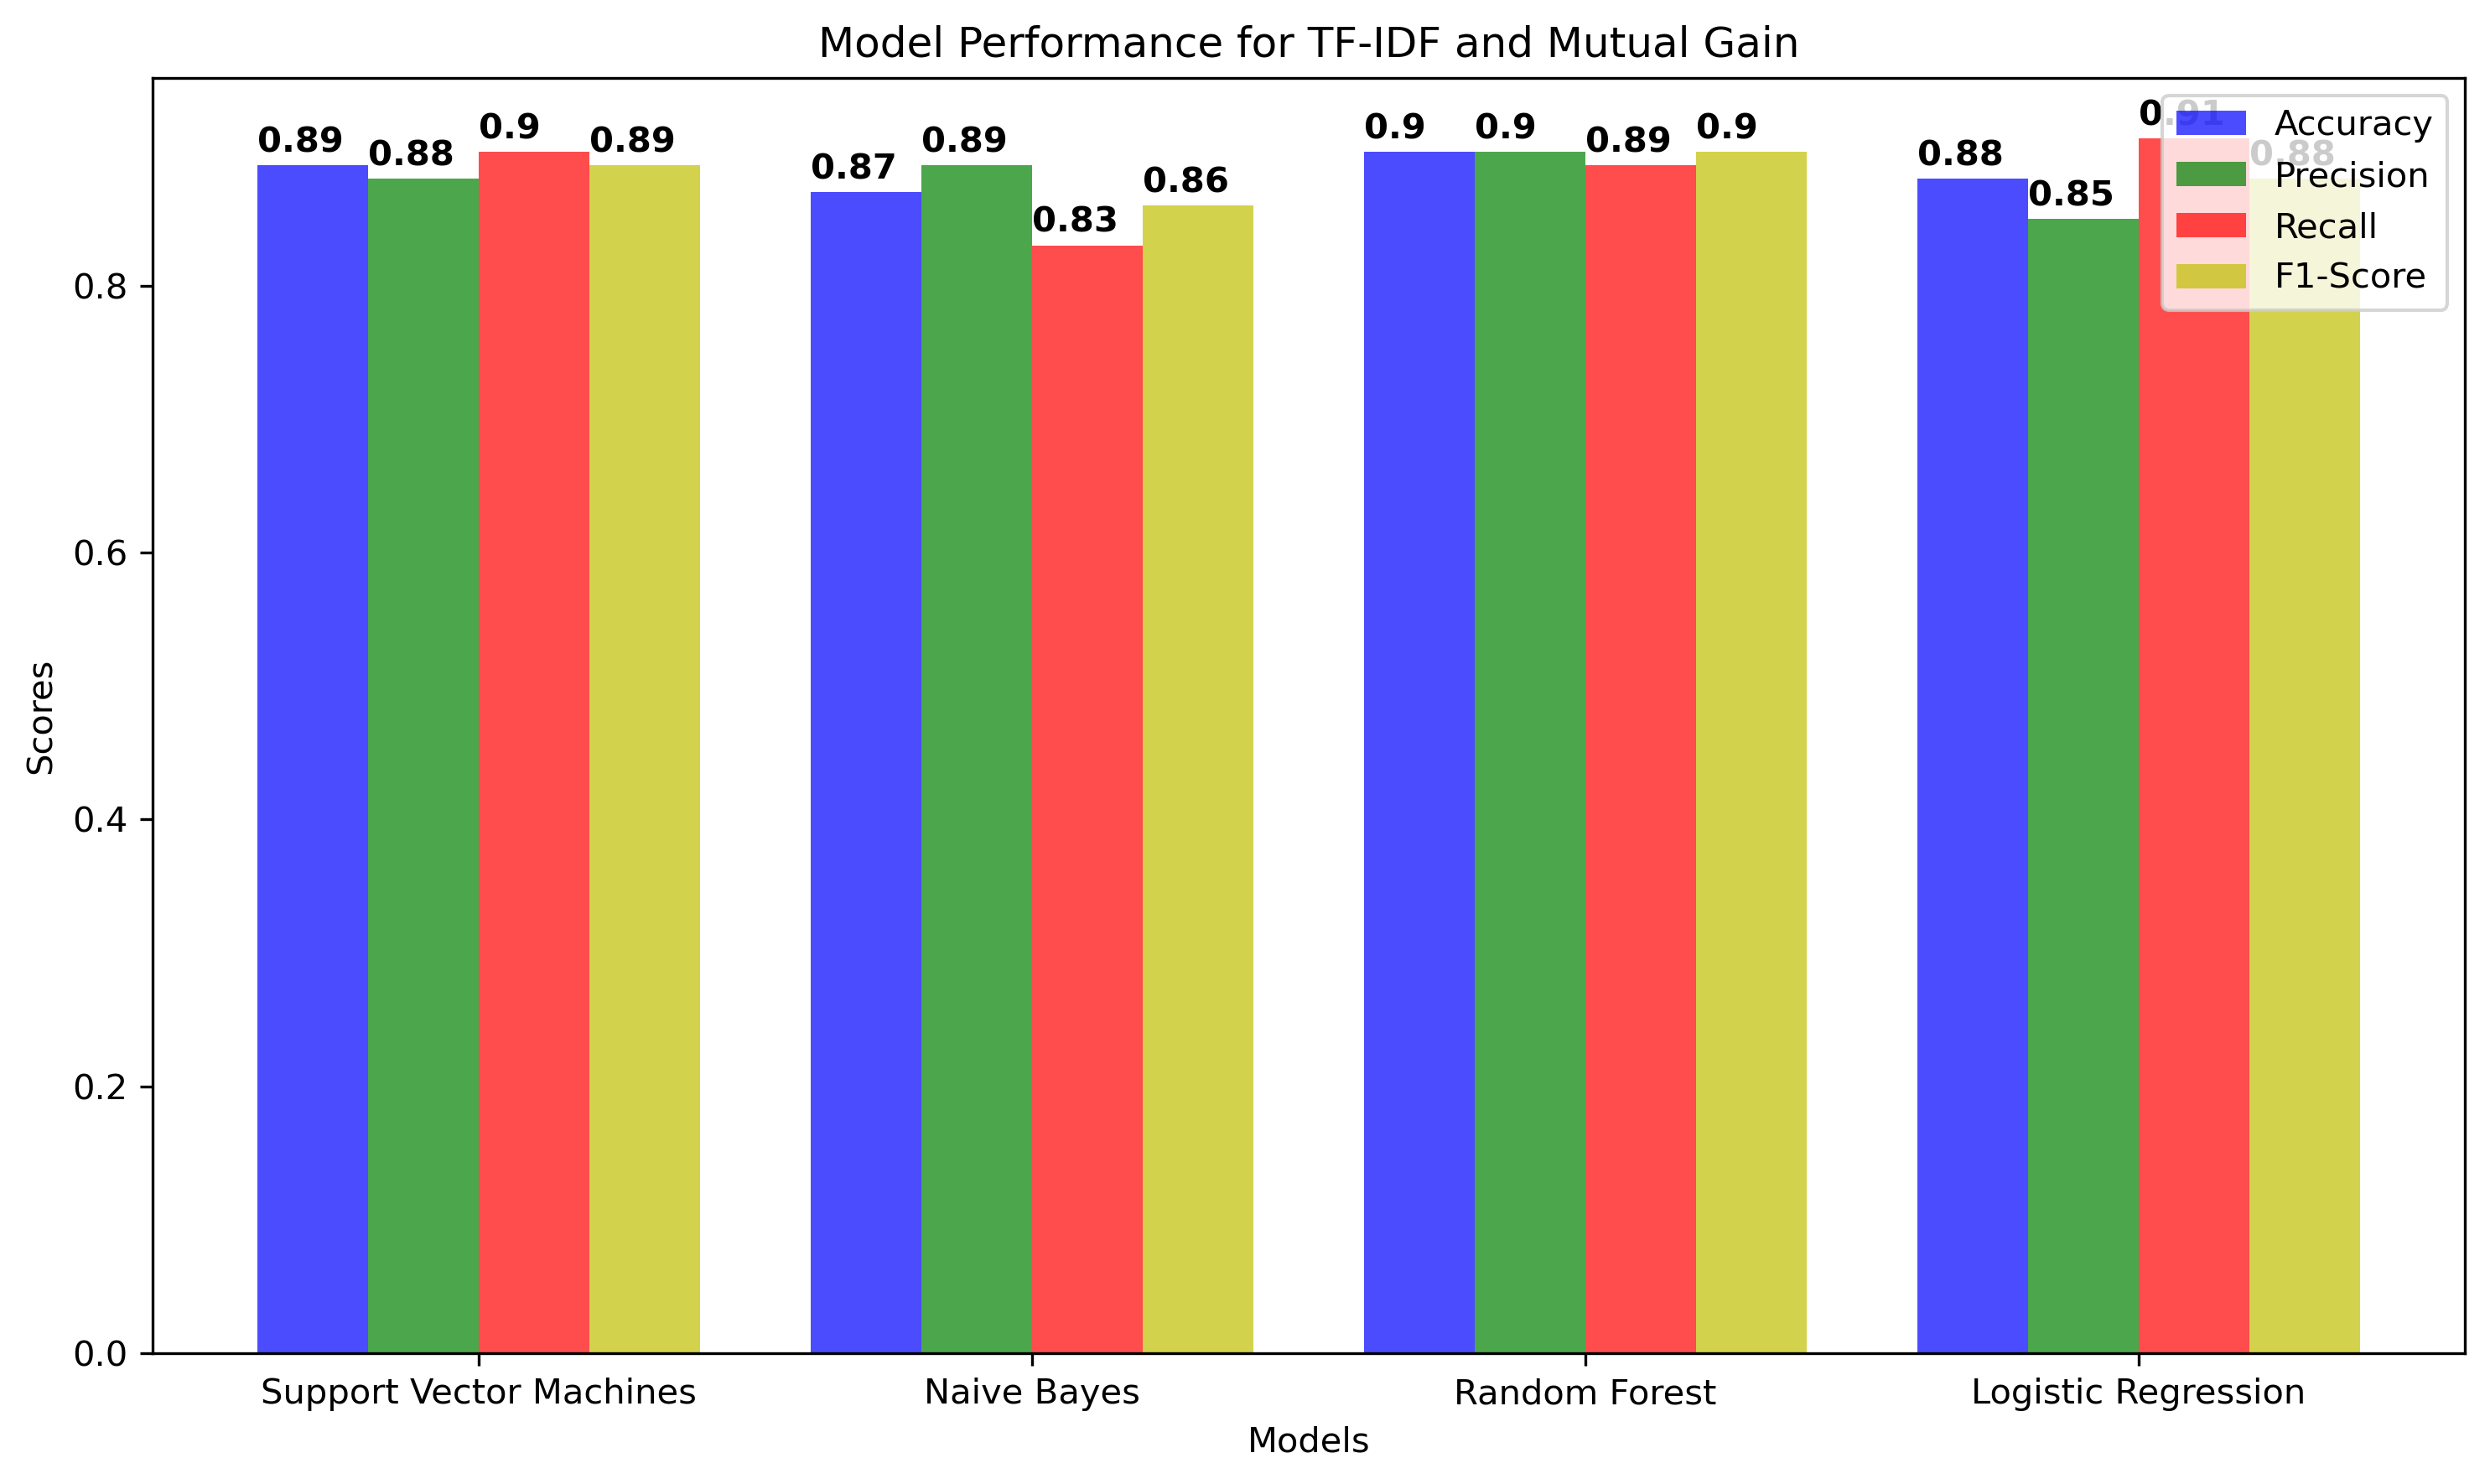

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding performance metrics
models = ['Support Vector Machines', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [0.89, 0.87, 0.90, 0.88]
precision = [0.88, 0.89, 0.90, 0.85]
recall = [0.90, 0.83, 0.89, 0.91]
f1_score = [0.89, 0.86, 0.90, 0.88]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Create subplots for each performance metric
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)

# Plot accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7, color='b', align='center')

# Plot precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7, color='g', align='center')

# Plot recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7, color='r', align='center')

# Plot F1-score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7, color='y', align='center')

# Set labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for TF-IDF and Mutual Gain')
plt.xticks(index + bar_width * 1.5, models)
plt.legend(loc='best')

# Add labels on top of bars
for i, v in enumerate(accuracy):
    plt.text(i - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(precision):
    plt.text(i + bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(recall):
    plt.text(i + 2 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(f1_score):
    plt.text(i + 3 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


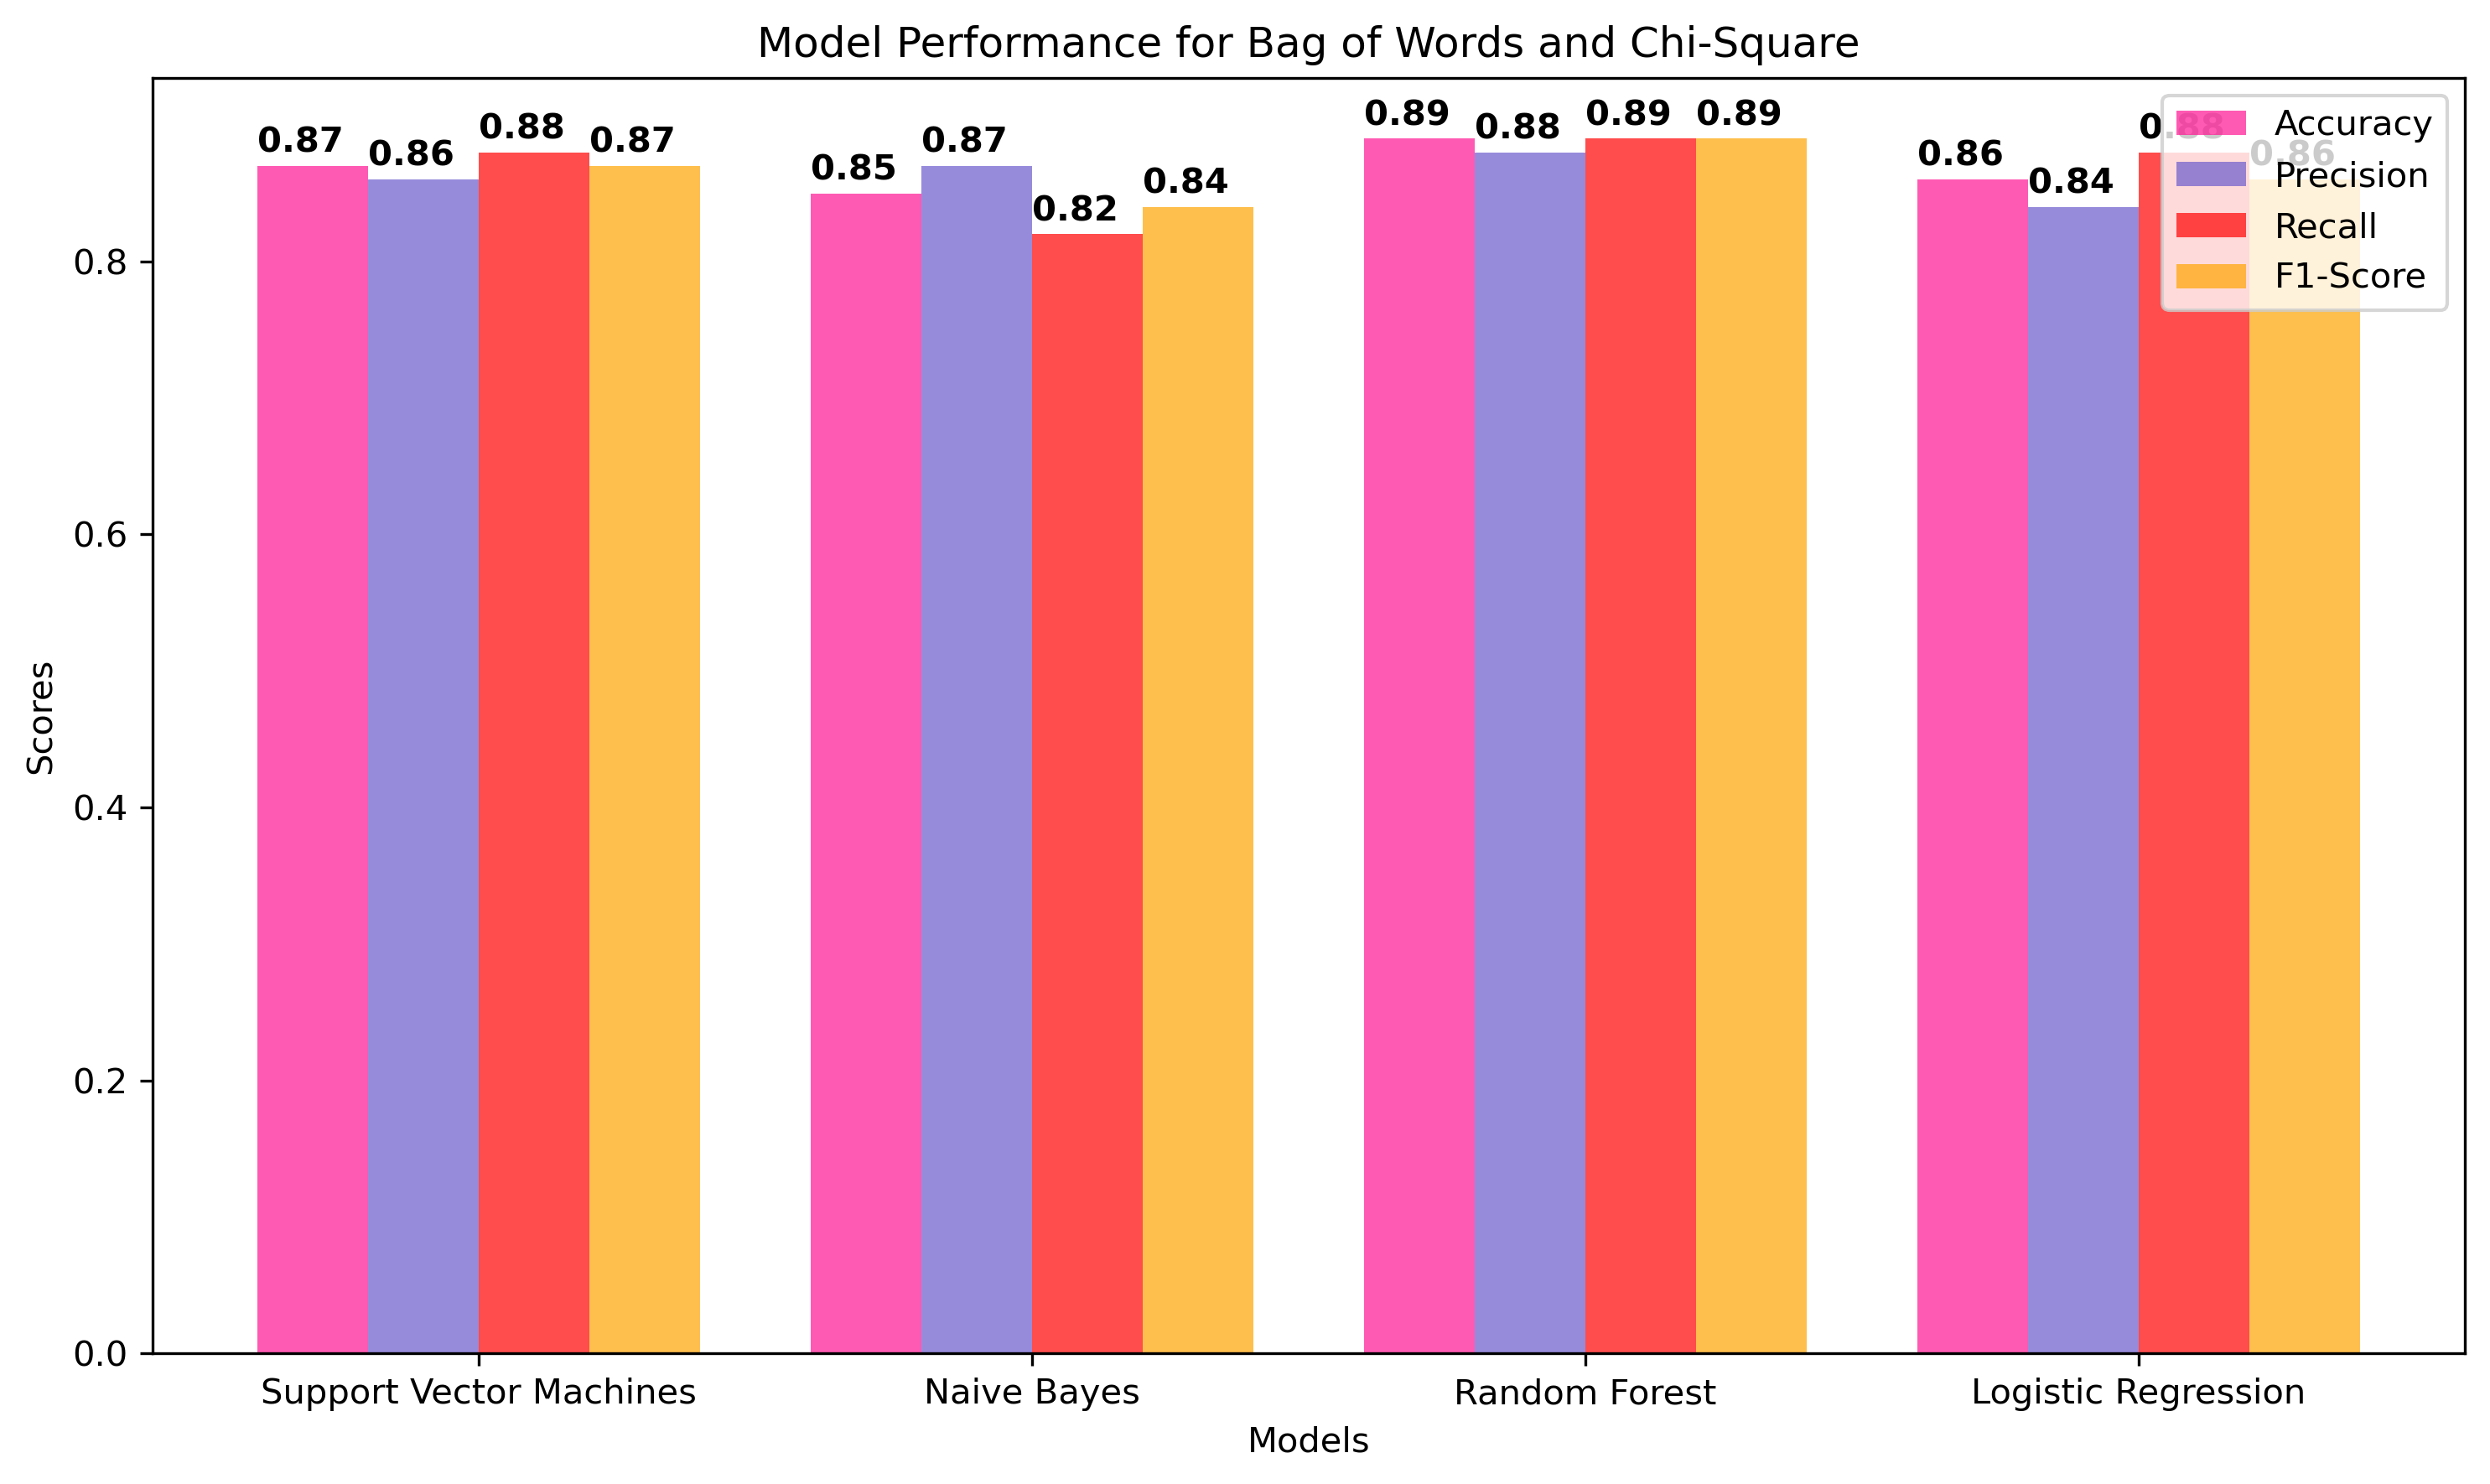

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding performance metrics
models = ['Support Vector Machines', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [0.87, 0.85, 0.89, 0.86]
precision = [0.86, 0.87, 0.88, 0.84]
recall = [0.88, 0.82, 0.89, 0.88]
f1_score = [0.87, 0.84, 0.89, 0.86]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Create subplots for each performance metric
fig, ax = plt.subplots(figsize=(10, 6), dpi =300)

# Plot accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7, color='deeppink', align='center')

# Plot precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7, color='slateblue', align='center')

# Plot recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7, color='r', align='center')

# Plot F1-score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7, color='orange', align='center')

# Set labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for Bag of Words and Chi-Square')
plt.xticks(index + bar_width * 1.5, models)
plt.legend(loc='best')

# Add labels on top of bars
for i, v in enumerate(accuracy):
    plt.text(i - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(precision):
    plt.text(i + bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(recall):
    plt.text(i + 2 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(f1_score):
    plt.text(i + 3 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


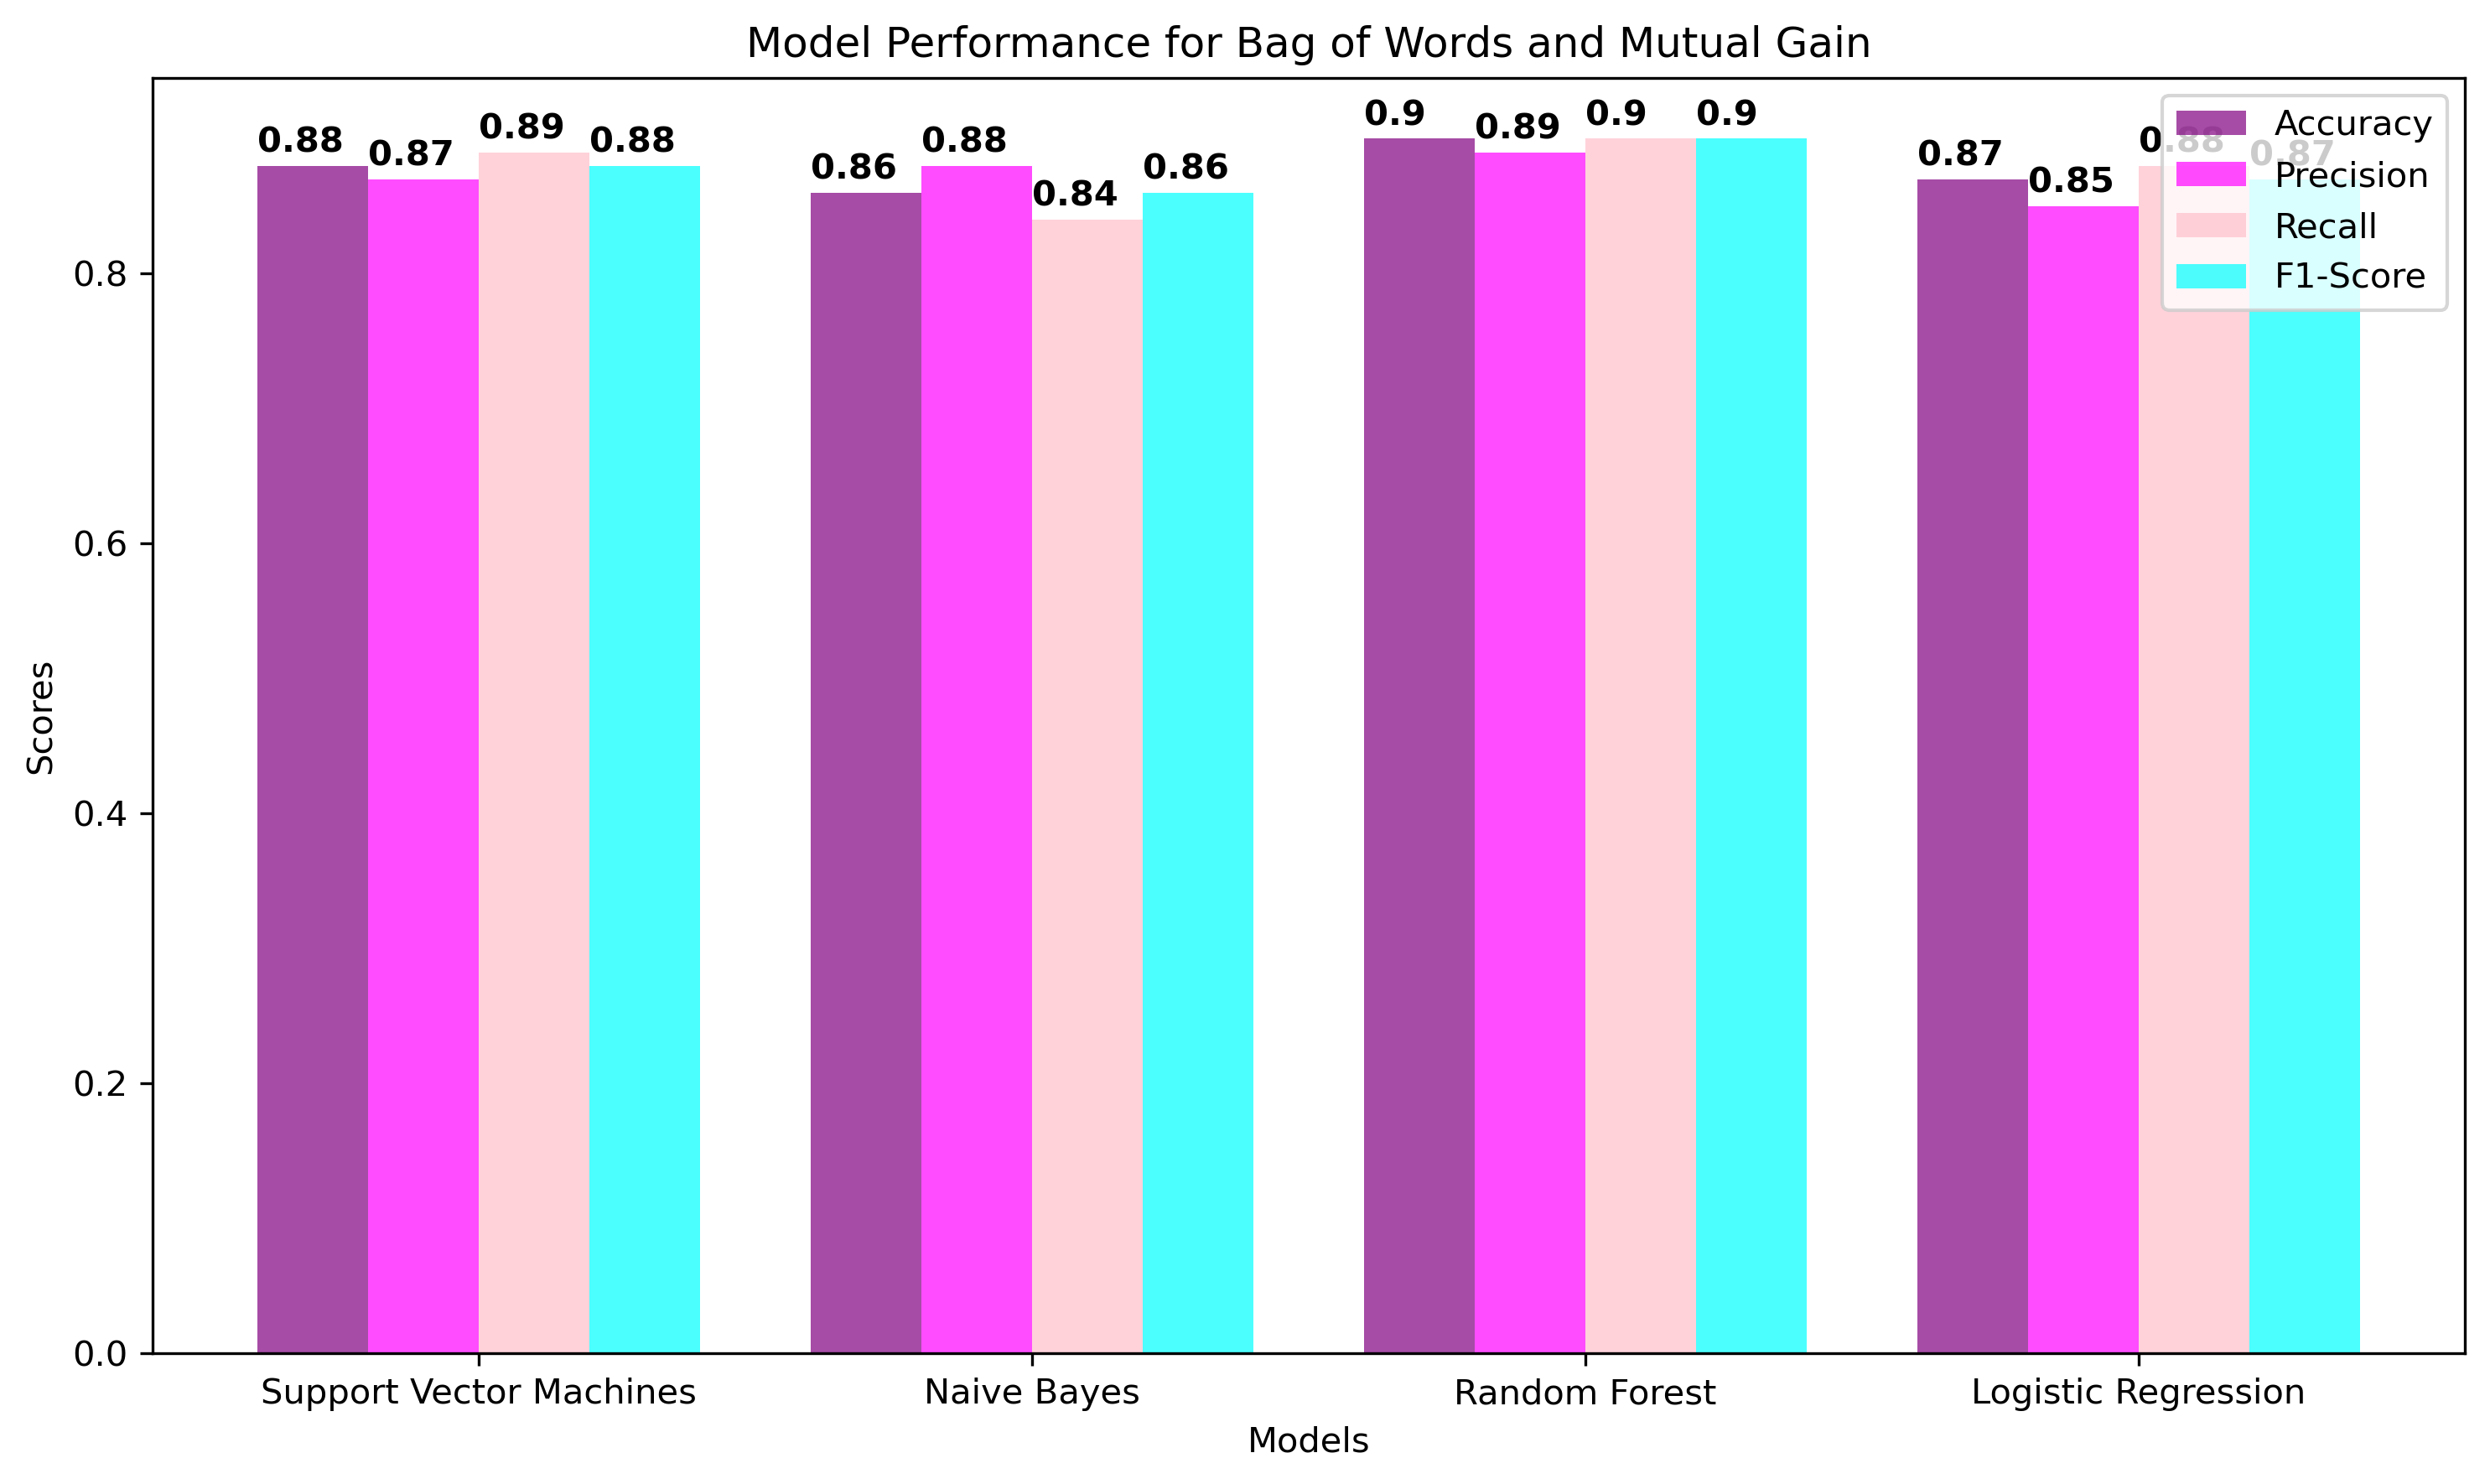

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding performance metrics
models = ['Support Vector Machines', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [0.88, 0.86, 0.90, 0.87]
precision = [0.87, 0.88, 0.89, 0.85]
recall = [0.89, 0.84, 0.90, 0.88]
f1_score = [0.88, 0.86, 0.90, 0.87]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Create subplots for each performance metric
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)

# Plot accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7, color='purple', align='center')

# Plot precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7, color='magenta', align='center')

# Plot recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7, color='pink', align='center')

# Plot F1-score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7, color='aqua', align='center')

# Set labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for Bag of Words and Mutual Gain')
plt.xticks(index + bar_width * 1.5, models)
plt.legend(loc='best')

# Add labels on top of bars
for i, v in enumerate(accuracy):
    plt.text(i - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(precision):
    plt.text(i + bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(recall):
    plt.text(i + 2 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(f1_score):
    plt.text(i + 3 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


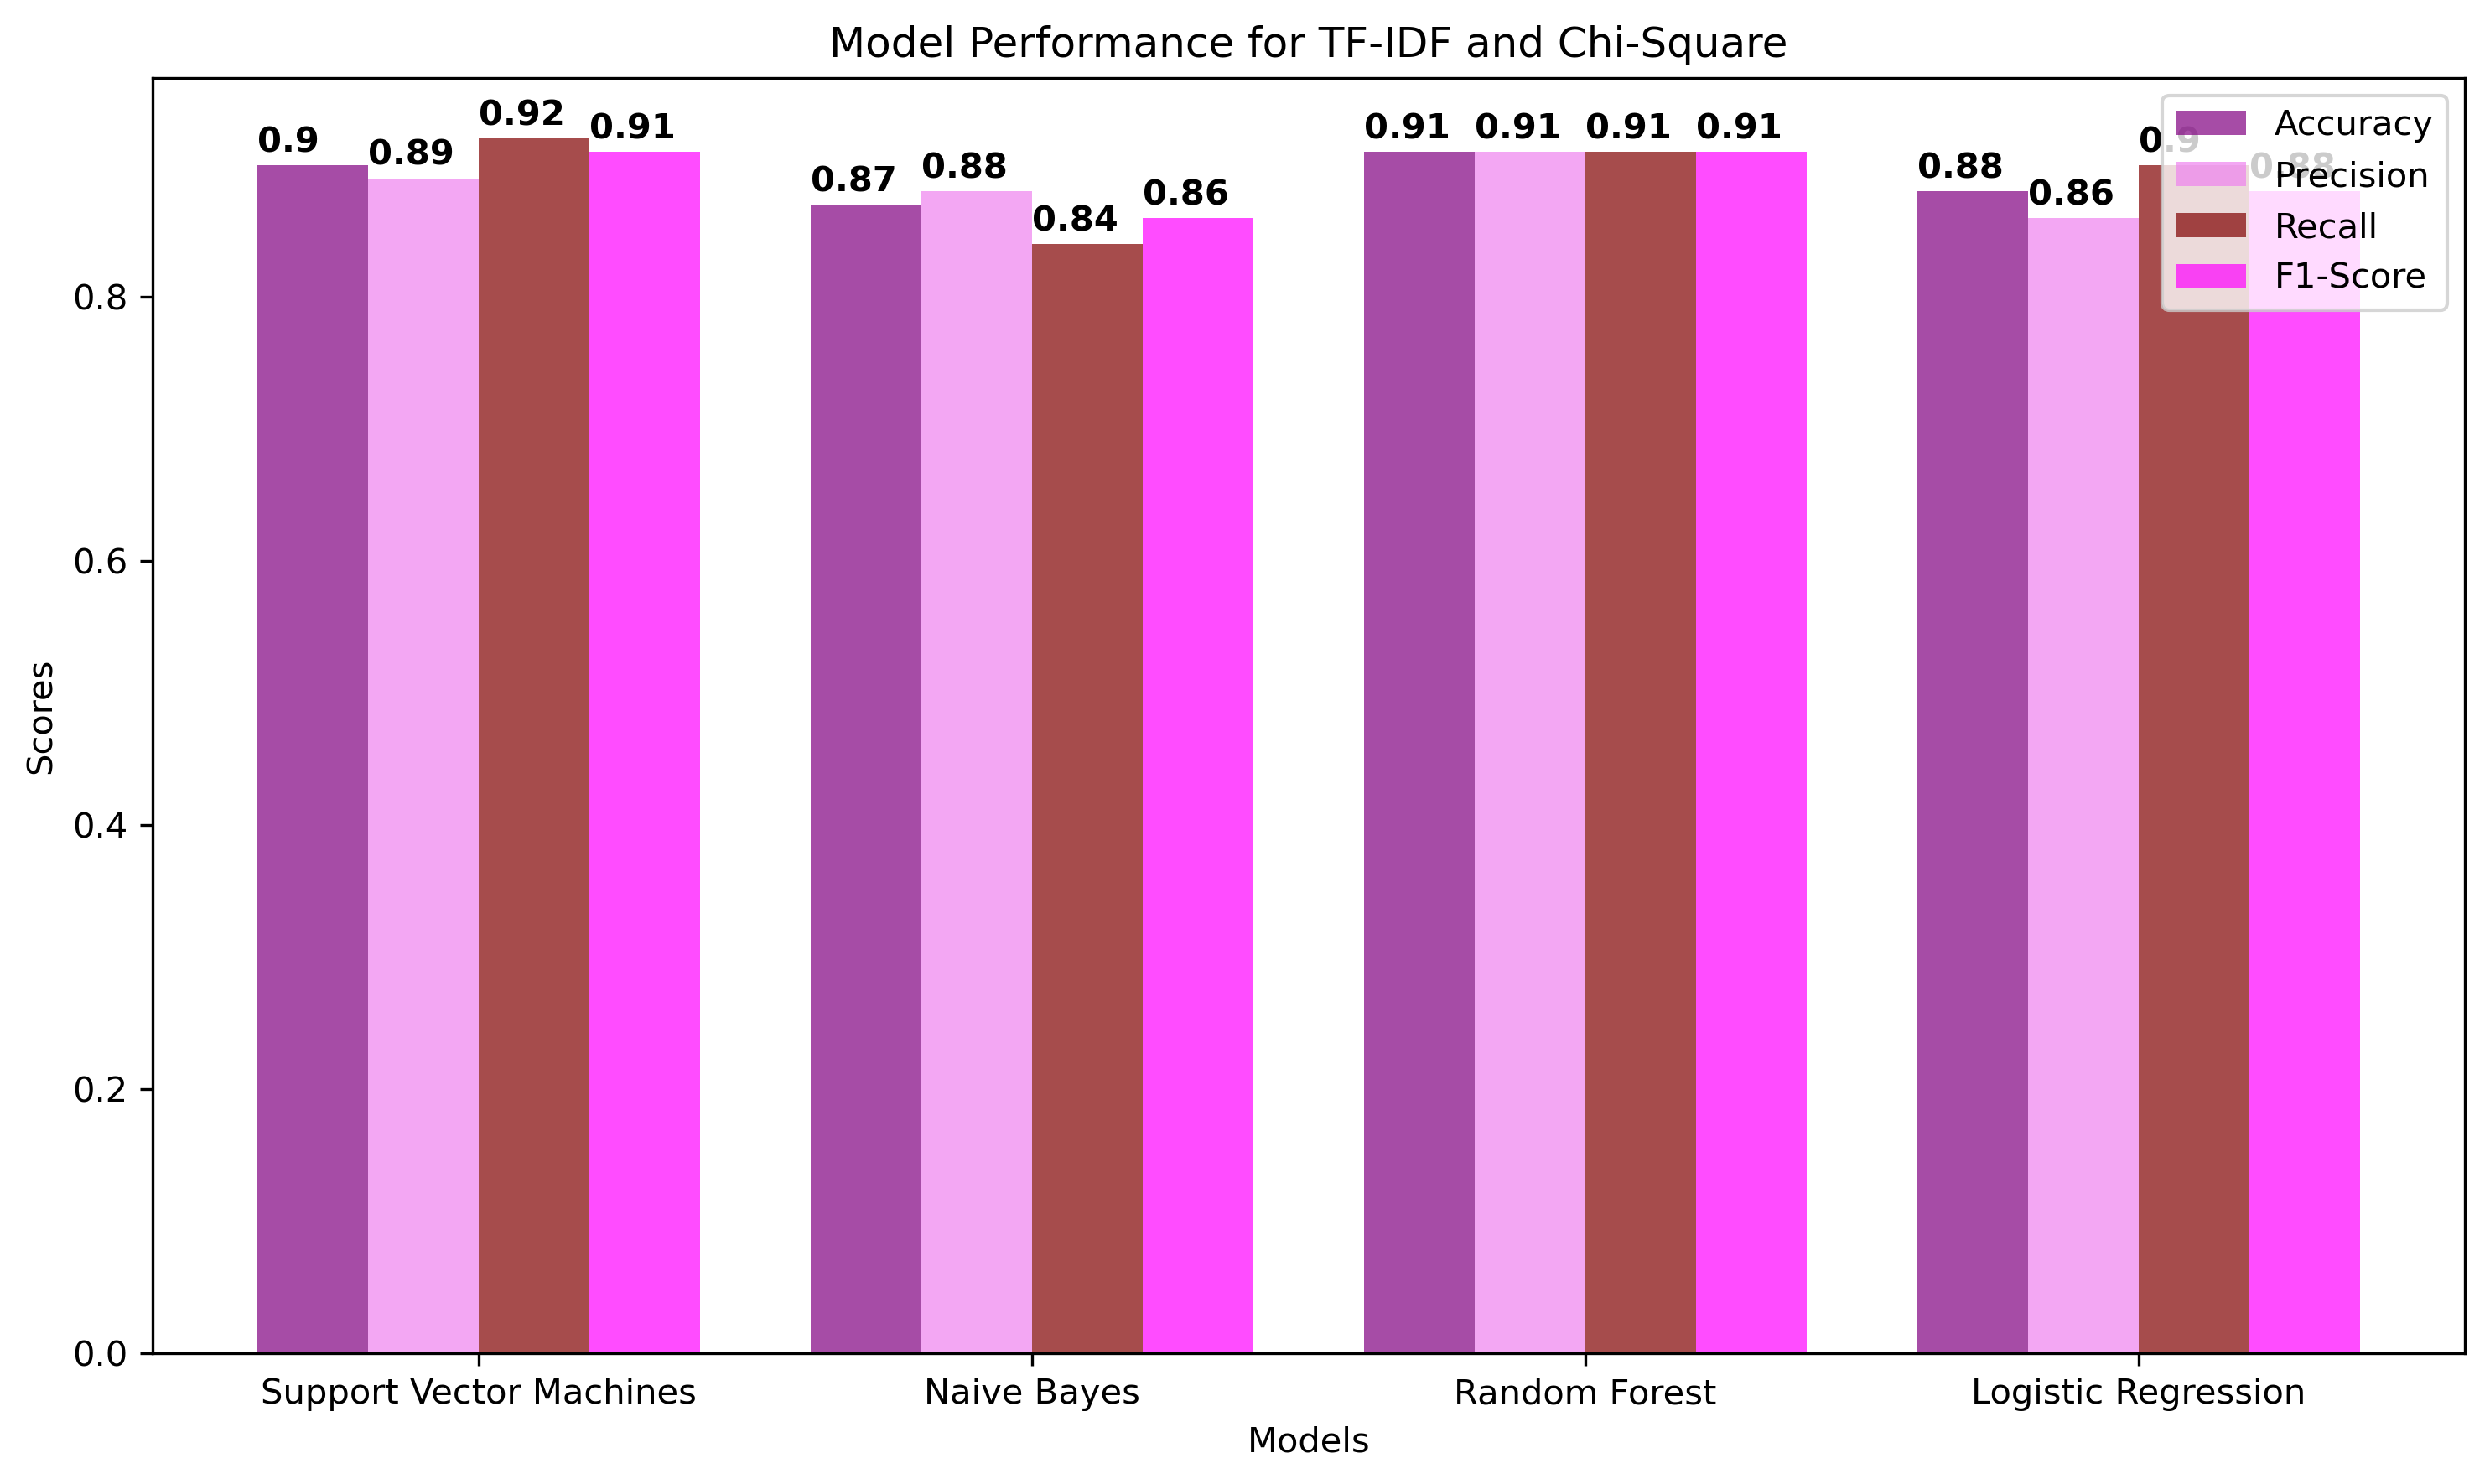

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding performance metrics
models = ['Support Vector Machines', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [0.90, 0.87, 0.91, 0.88]
precision = [0.89, 0.88, 0.91, 0.86]
recall = [0.92, 0.84, 0.91, 0.90]
f1_score = [0.91, 0.86, 0.91, 0.88]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Create subplots for each performance metric
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)

# Plot accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7, color='purple', align='center')

# Plot precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7, color='violet', align='center')

# Plot recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7, color='maroon', align='center')

# Plot F1-score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', alpha=0.7, color='magenta', align='center')

# Set labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for TF-IDF and Chi-Square')
plt.xticks(index + bar_width * 1.5, models)
plt.legend(loc='best')

# Add labels on top of bars
for i, v in enumerate(accuracy):
    plt.text(i - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(precision):
    plt.text(i + bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(recall):
    plt.text(i + 2 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')
for i, v in enumerate(f1_score):
    plt.text(i + 3 * bar_width - 0.1, v + 0.01, str(v), color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


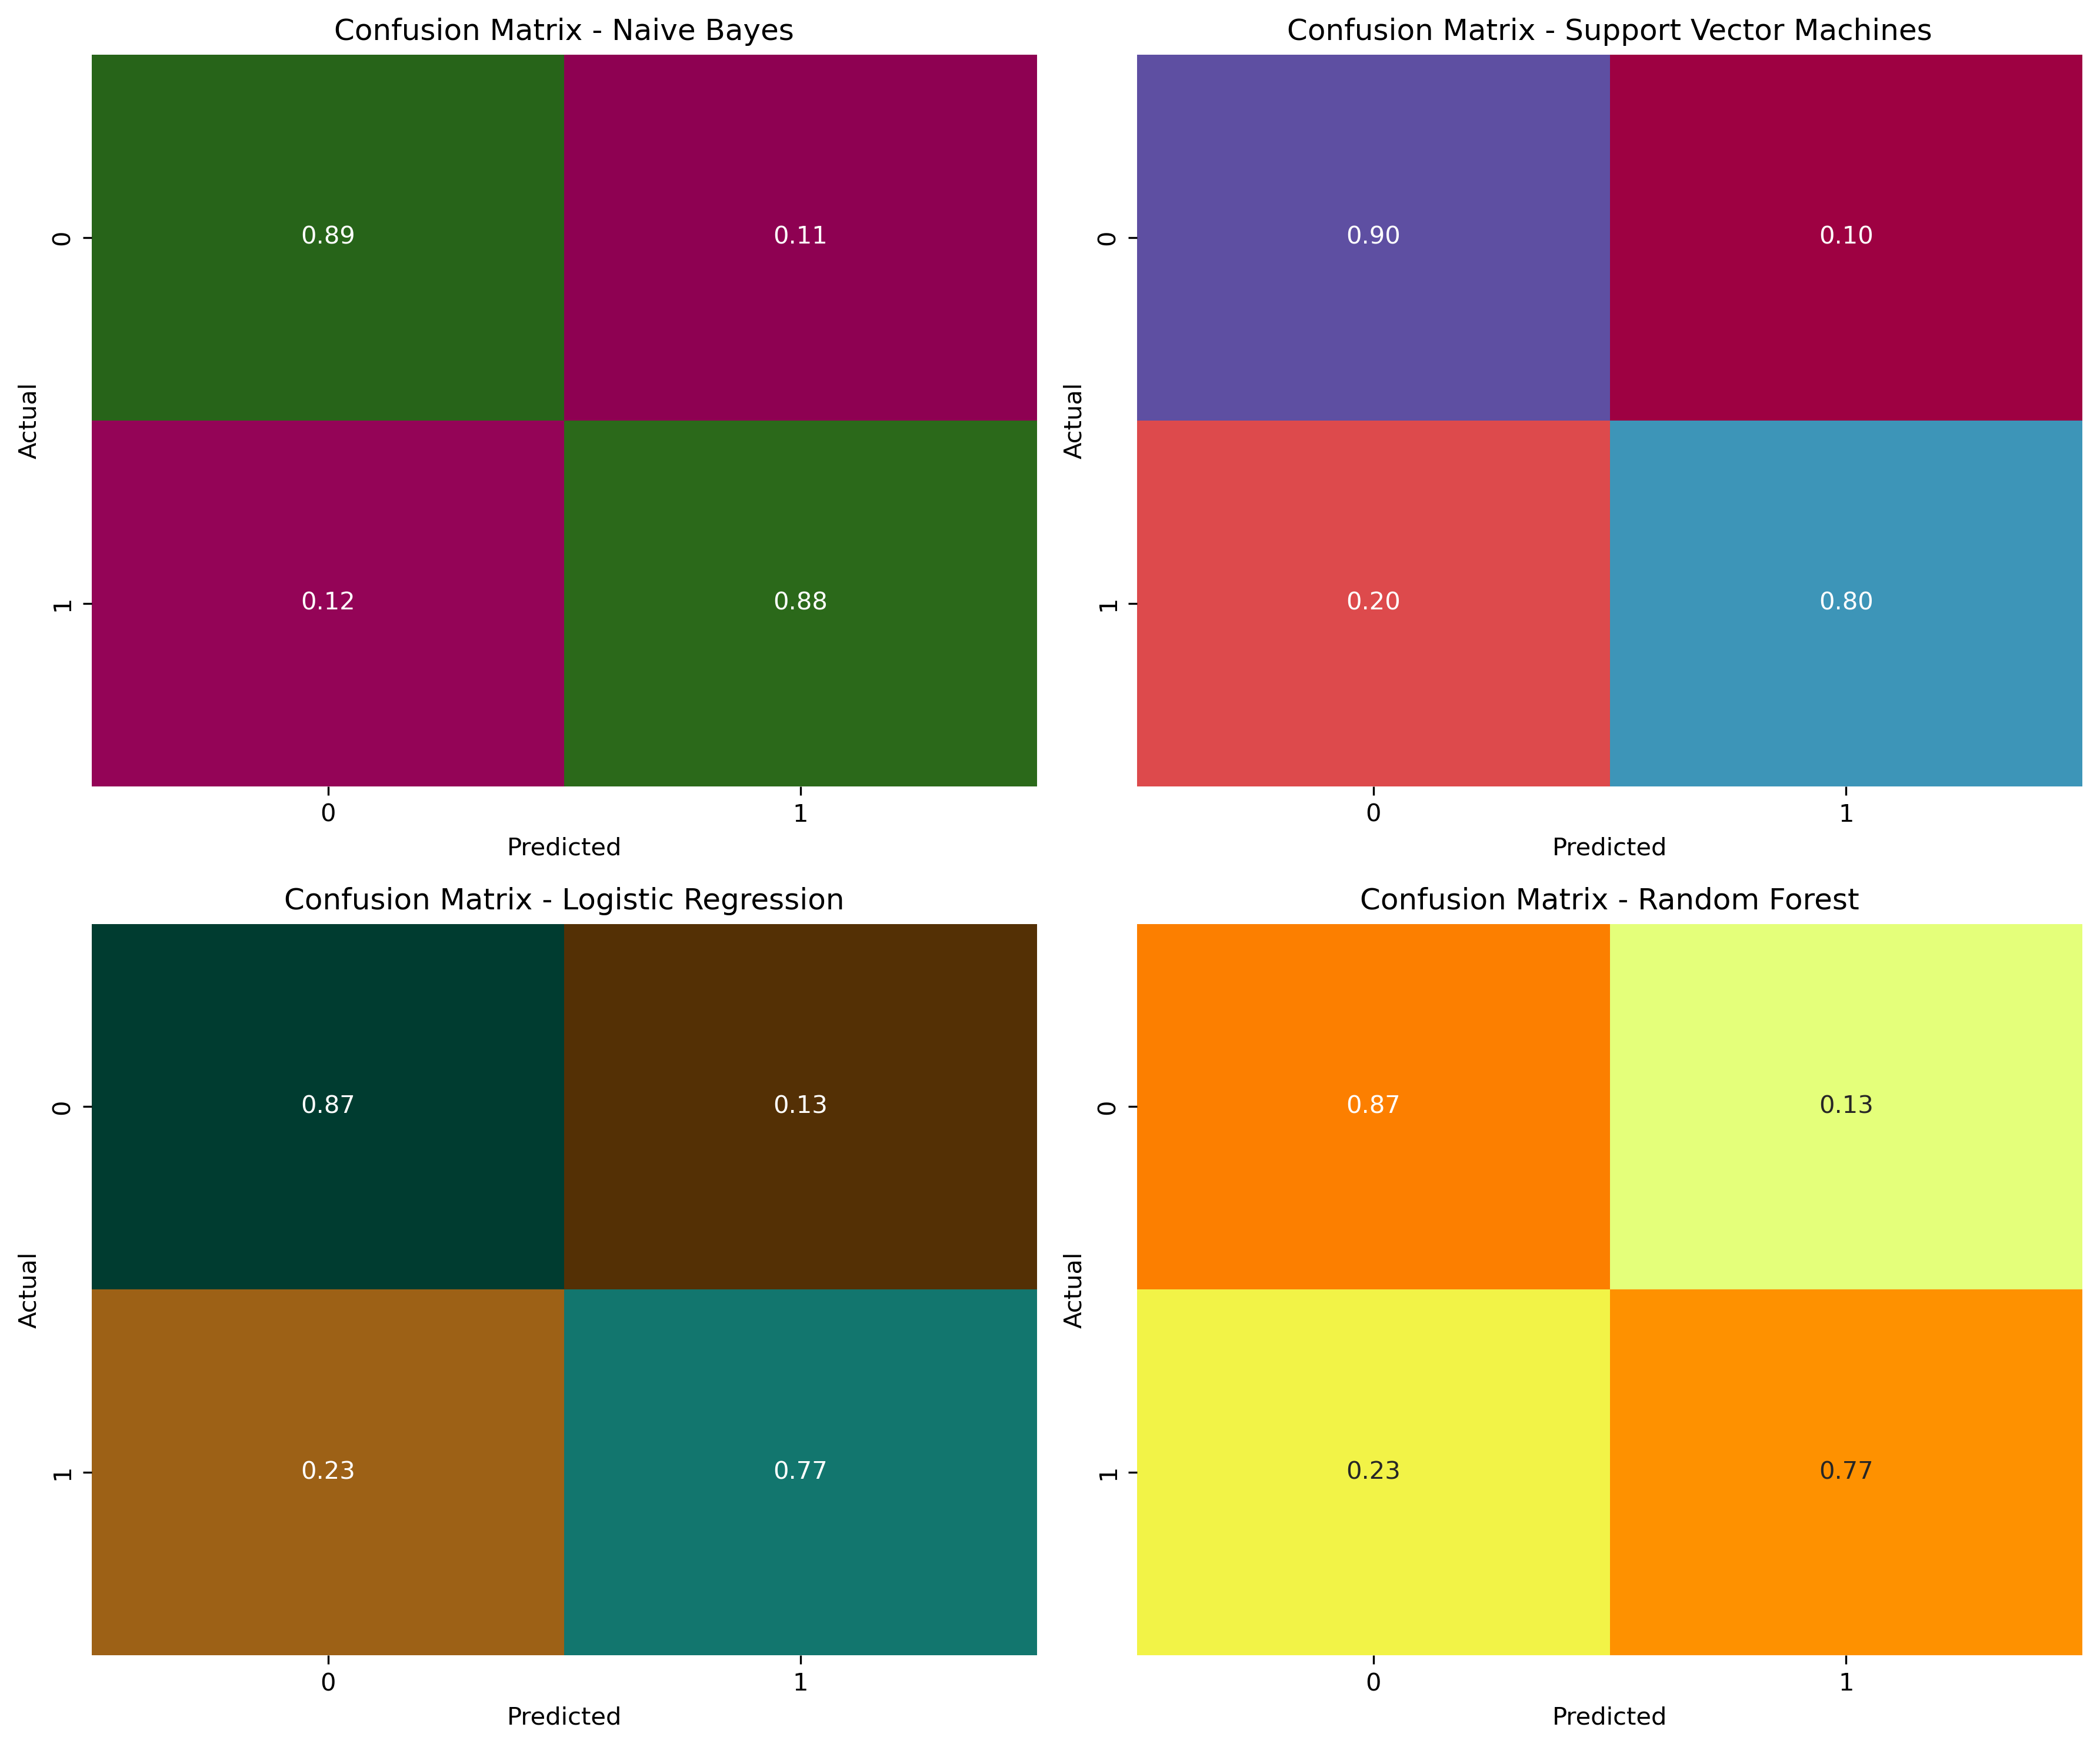

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each model
confusion_matrices = {
    'Naive Bayes': np.array([[0.89, 0.11], [0.12, 0.88]]),
    'Support Vector Machines': np.array([[0.90, 0.10], [0.20, 0.80]]),
    'Logistic Regression': np.array([[0.87, 0.13], [0.23, 0.77]]),
    'Random Forest': np.array([[0.87, 0.13], [0.23, 0.77]])
}

# Define the colormap for each confusion matrix
cmaps = ['PiYG', 'Spectral', 'BrBG', 'Wistia']

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi = 300)

# Loop through each model and plot the confusion matrix
for i, (model, cmap) in enumerate(zip(confusion_matrices.keys(), cmaps)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(confusion_matrices[model], annot=True, fmt=".2f", cmap=cmap, ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


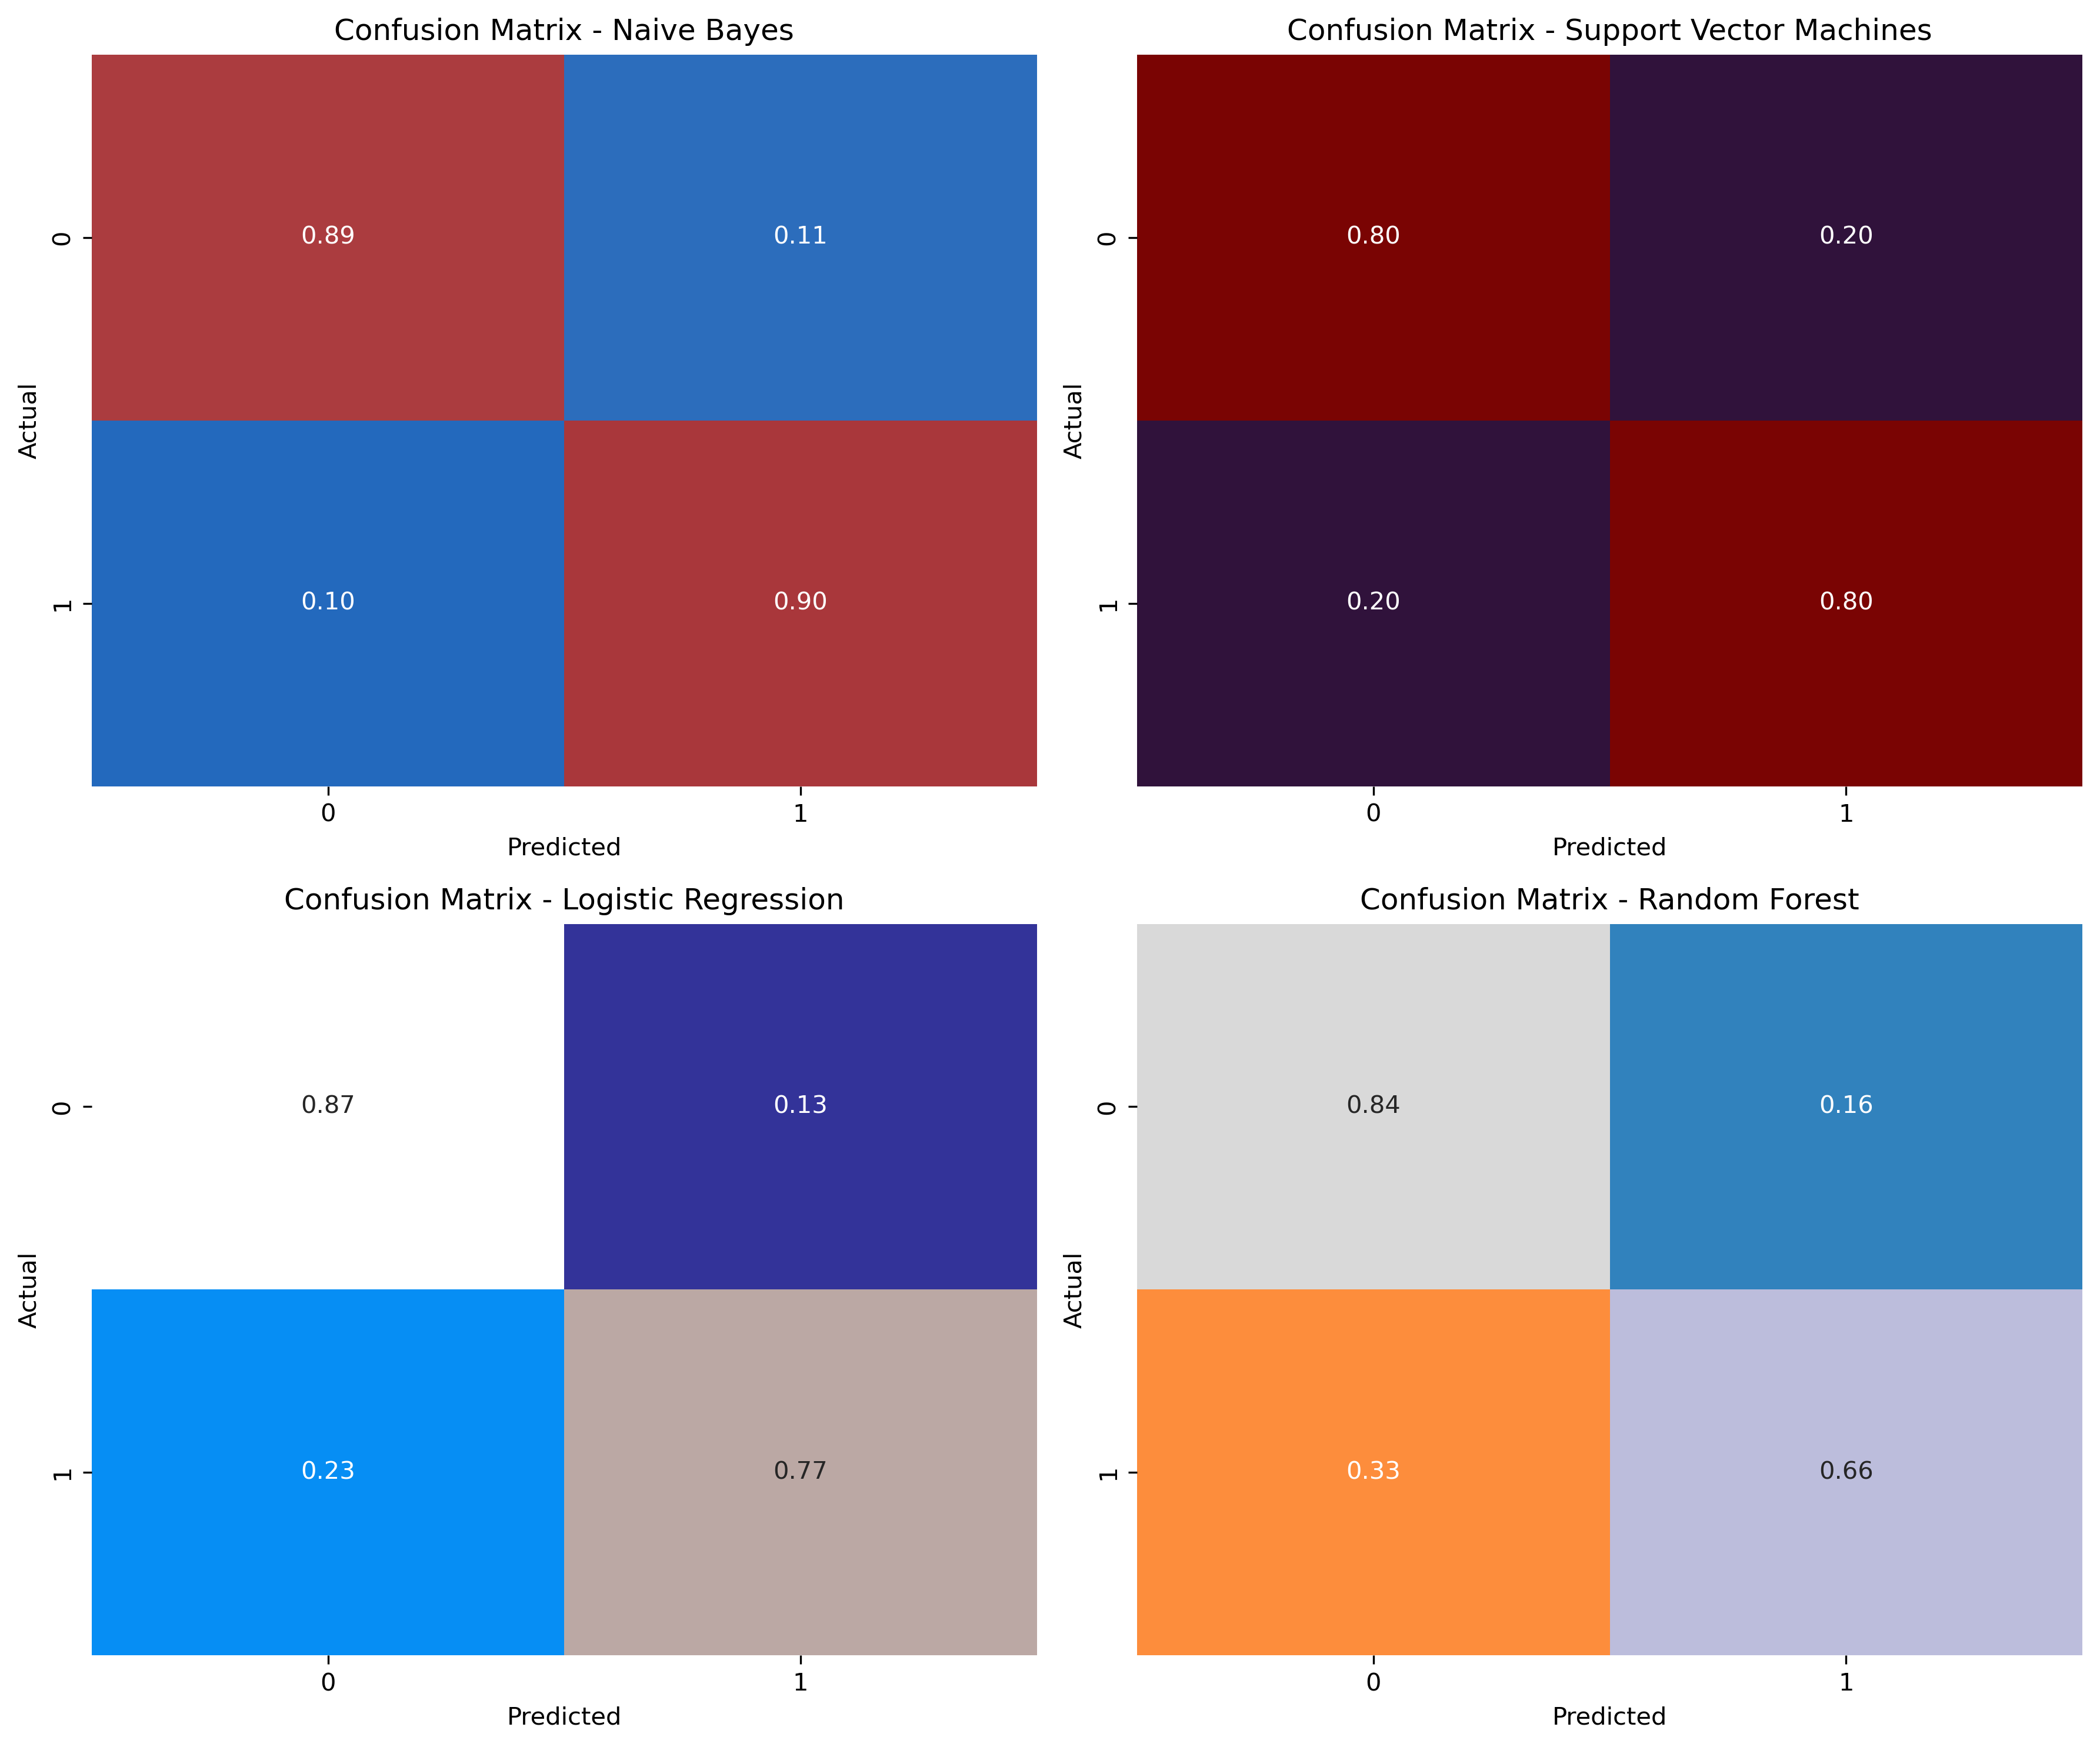

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each model
confusion_matrices = {
    'Naive Bayes': np.array([[0.89, 0.11], [0.10, 0.90]]),
    'Support Vector Machines': np.array([[0.80, 0.20], [0.20, 0.80]]),
    'Logistic Regression': np.array([[0.87, 0.13], [0.23, 0.77]]),
    'Random Forest': np.array([[0.84, 0.16], [0.33, 0.66]])
}

# Define the colormap for each confusion matrix
cmaps = ['vlag', 'turbo', 'terrain', 'tab20c']

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi = 300)

# Loop through each model and plot the confusion matrix
for i, (model, cmap) in enumerate(zip(confusion_matrices.keys(), cmaps)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(confusion_matrices[model], annot=True, fmt=".2f", cmap=cmap, ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


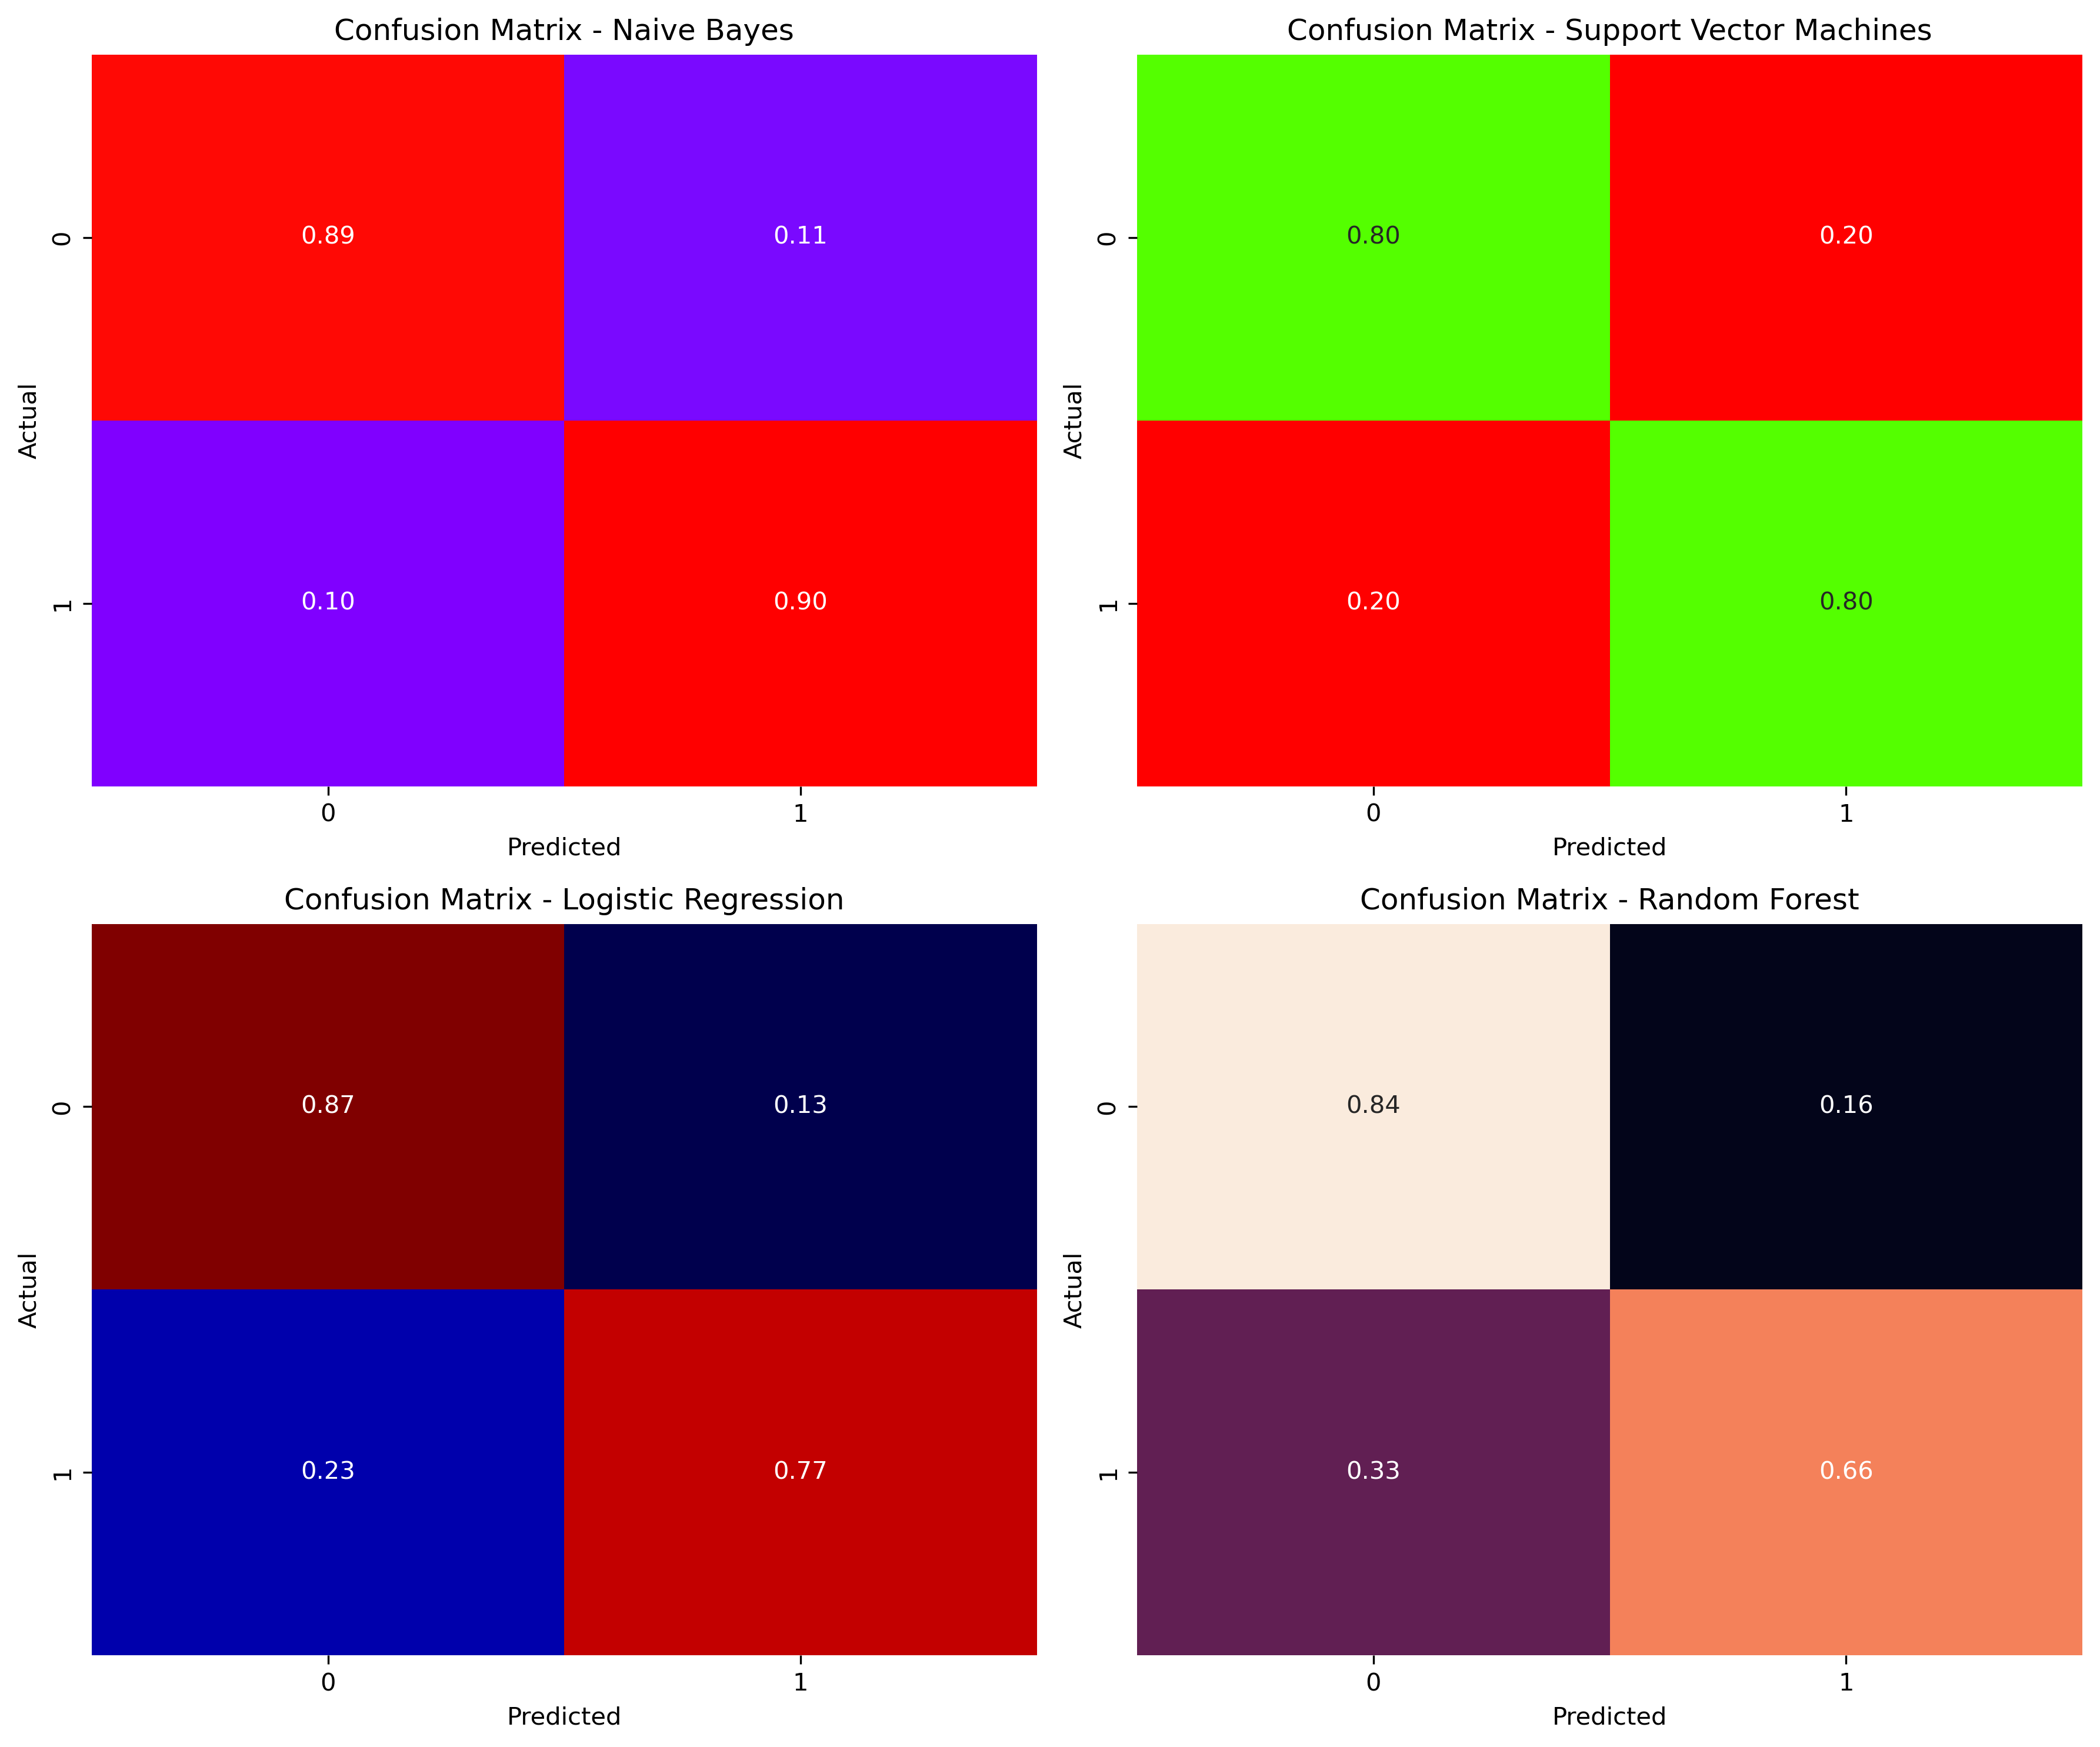

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices for each model
confusion_matrices = {
    'Naive Bayes': np.array([[0.89, 0.11], [0.10, 0.90]]),
    'Support Vector Machines': np.array([[0.80, 0.20], [0.20, 0.80]]),
    'Logistic Regression': np.array([[0.87, 0.13], [0.23, 0.77]]),
    'Random Forest': np.array([[0.84, 0.16], [0.33, 0.66]])
}

# Define the colormap for each confusion matrix
cmaps = ['rainbow', 'prism', 'seismic', 'rocket']

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi = 300)

# Loop through each model and plot the confusion matrix
for i, (model, cmap) in enumerate(zip(confusion_matrices.keys(), cmaps)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(confusion_matrices[model], annot=True, fmt=".2f", cmap=cmap, ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


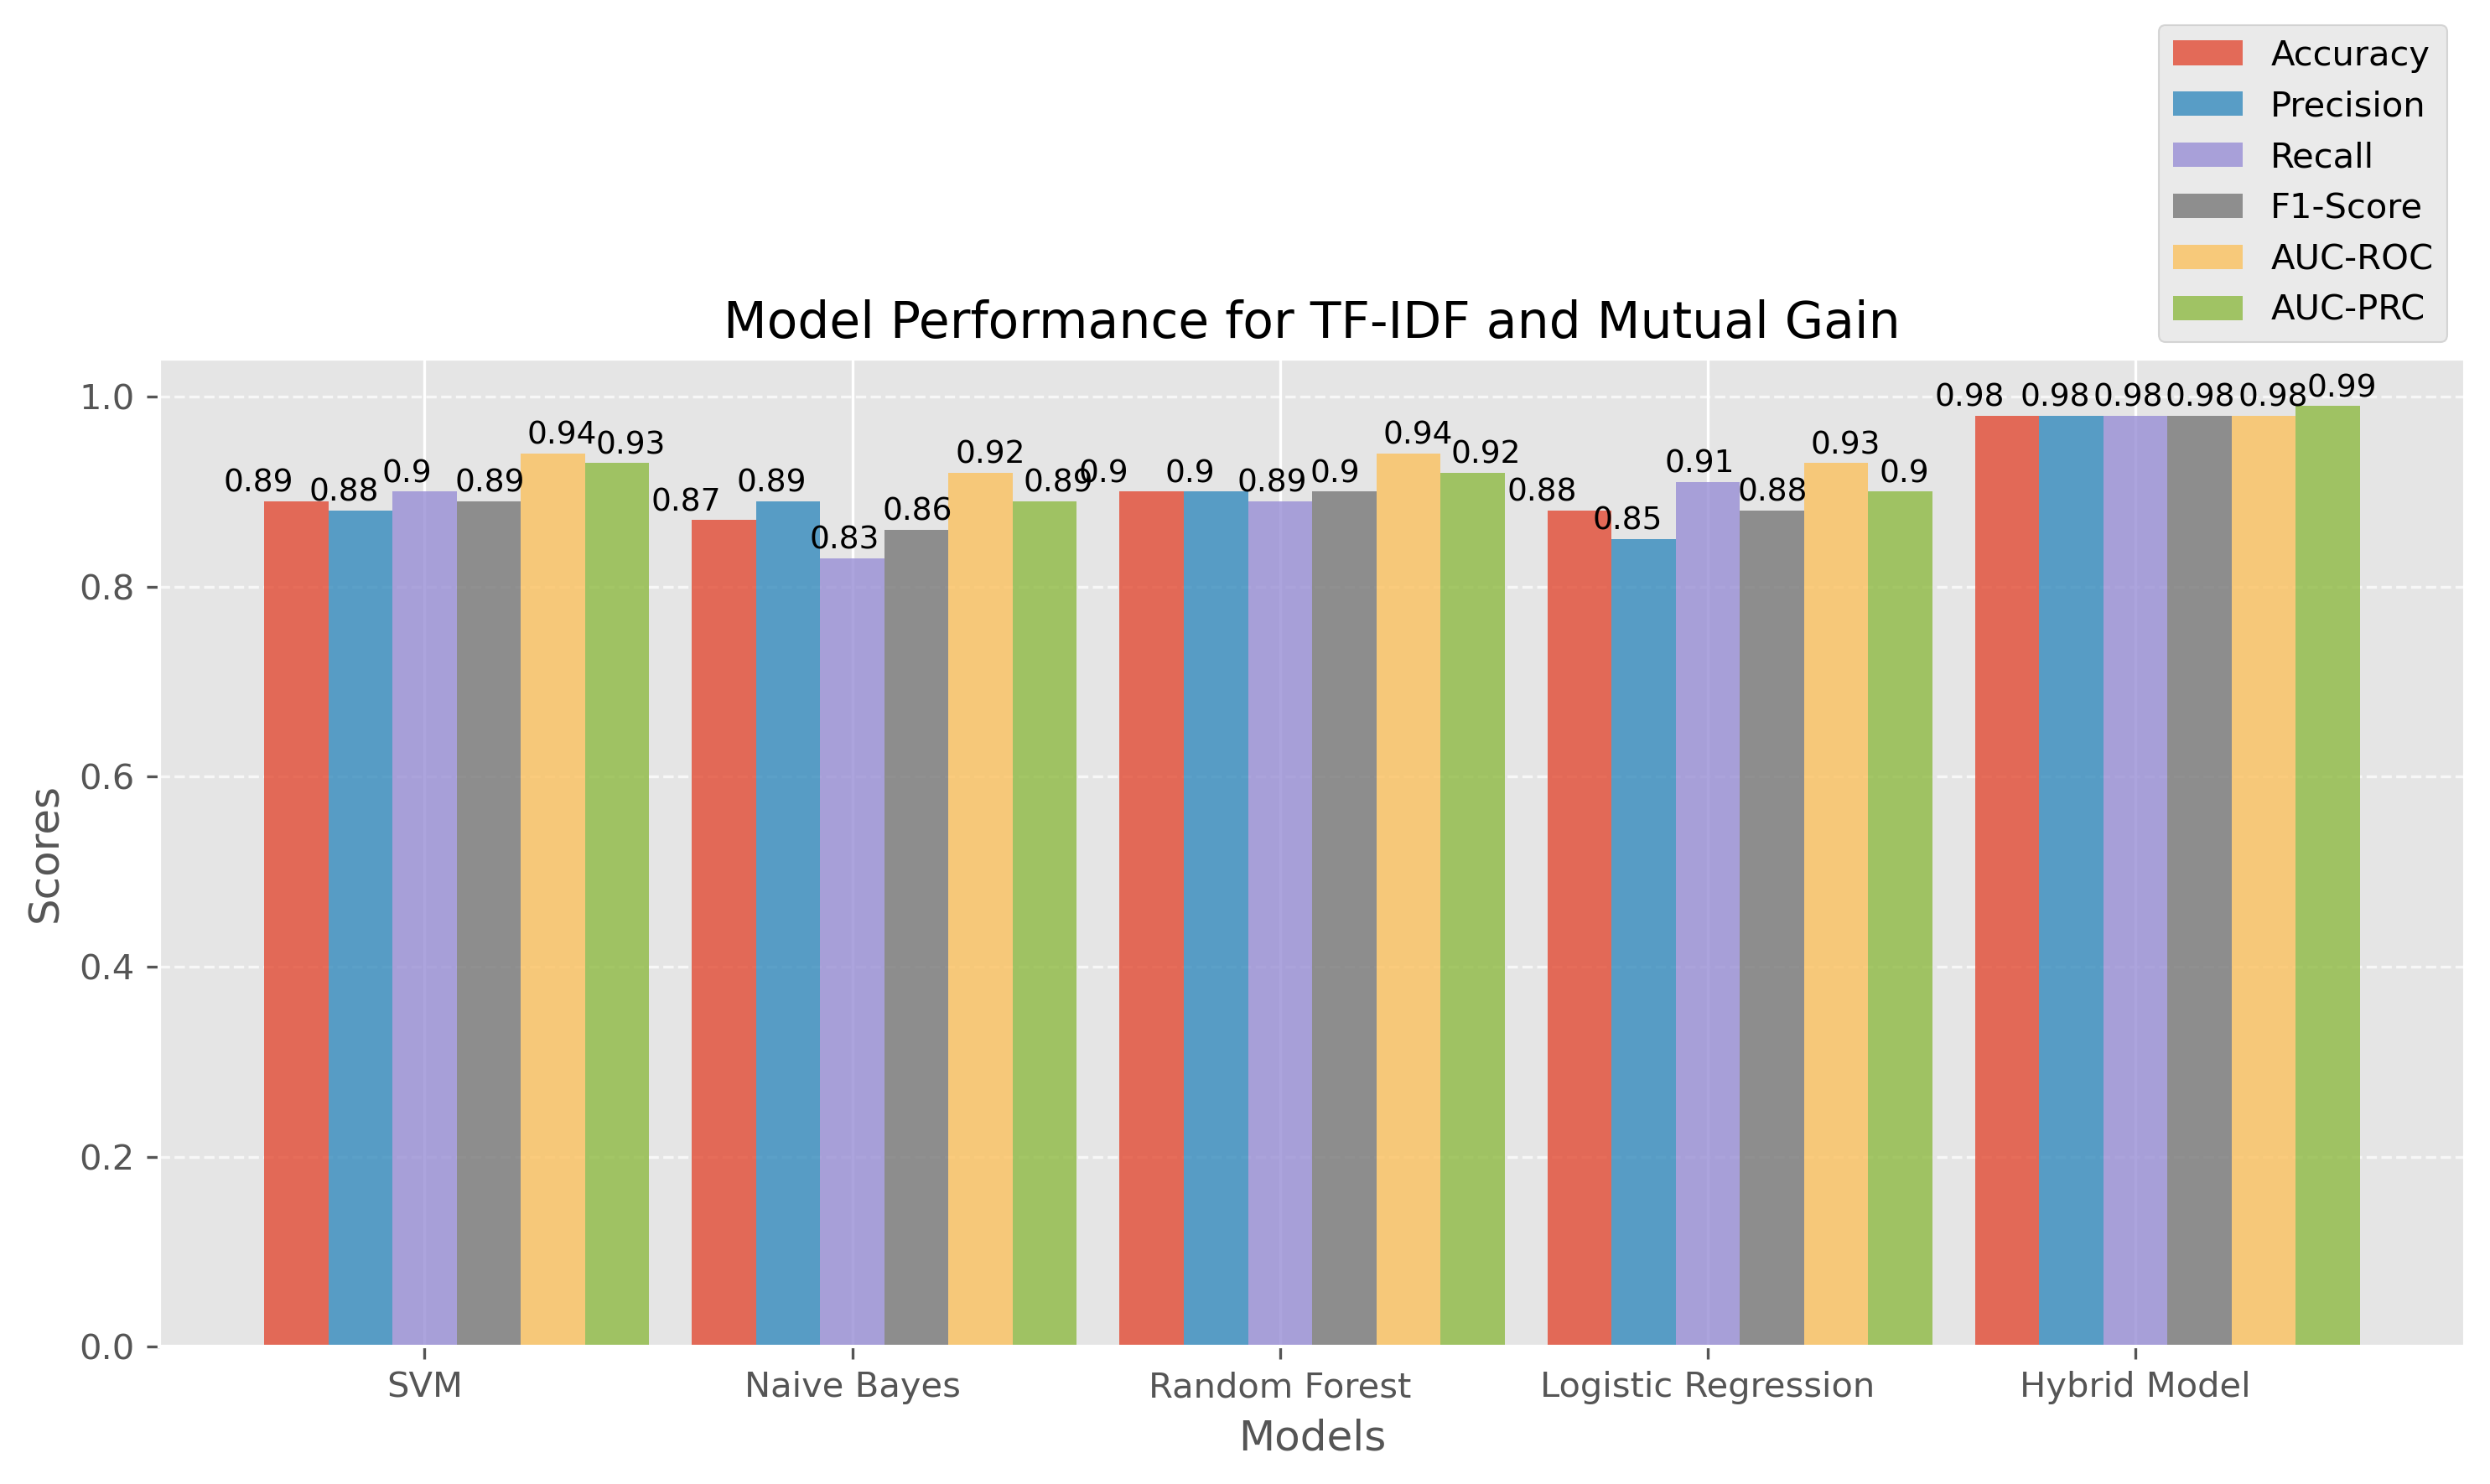

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and performance metrics
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Hybrid Model']
accuracy = [0.89, 0.87, 0.90, 0.88, 0.98]
precision = [0.88, 0.89, 0.90, 0.85, 0.98]
recall = [0.90, 0.83, 0.89, 0.91, 0.98]
f1_score = [0.89, 0.86, 0.90, 0.88, 0.98]
auc_roc = [0.94, 0.92, 0.94, 0.93, 0.98]
auc_prc = [0.93, 0.89, 0.92, 0.90, 0.99]

# Set the figure size and style
plt.figure(figsize=(10, 6), dpi = 300)
plt.style.use('ggplot')

# Define the width of each bar
bar_width = 0.15

# Create an array for the x-axis positions of the bars
x = np.arange(len(models))

# Create bar plots for each performance metric
plt.bar(x, accuracy, width=bar_width, label='Accuracy', alpha=0.8)
plt.bar(x + bar_width, precision, width=bar_width, label='Precision', alpha=0.8)
plt.bar(x + 2 * bar_width, recall, width=bar_width, label='Recall', alpha=0.8)
plt.bar(x + 3 * bar_width, f1_score, width=bar_width, label='F1-Score', alpha=0.8)
plt.bar(x + 4 * bar_width, auc_roc, width=bar_width, label='AUC-ROC', alpha=0.8)
plt.bar(x + 5 * bar_width, auc_prc, width=bar_width, label='AUC-PRC', alpha=0.8)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for TF-IDF and Mutual Gain')
plt.xticks(x + 2 * bar_width, models)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, value in enumerate(accuracy):
    plt.text(i - 0.17, value + 0.01, str(value), fontsize=9)
    plt.text(i + 0.03, precision[i] + 0.01, str(precision[i]), fontsize=9)
    plt.text(i + 0.2, recall[i] + 0.01, str(recall[i]), fontsize=9)
    plt.text(i + 0.37, f1_score[i] + 0.01, str(f1_score[i]), fontsize=9)
    plt.text(i + 0.54, auc_roc[i] + 0.01, str(auc_roc[i]), fontsize=9)
    plt.text(i + 0.7, auc_prc[i] + 0.01, str(auc_prc[i]), fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


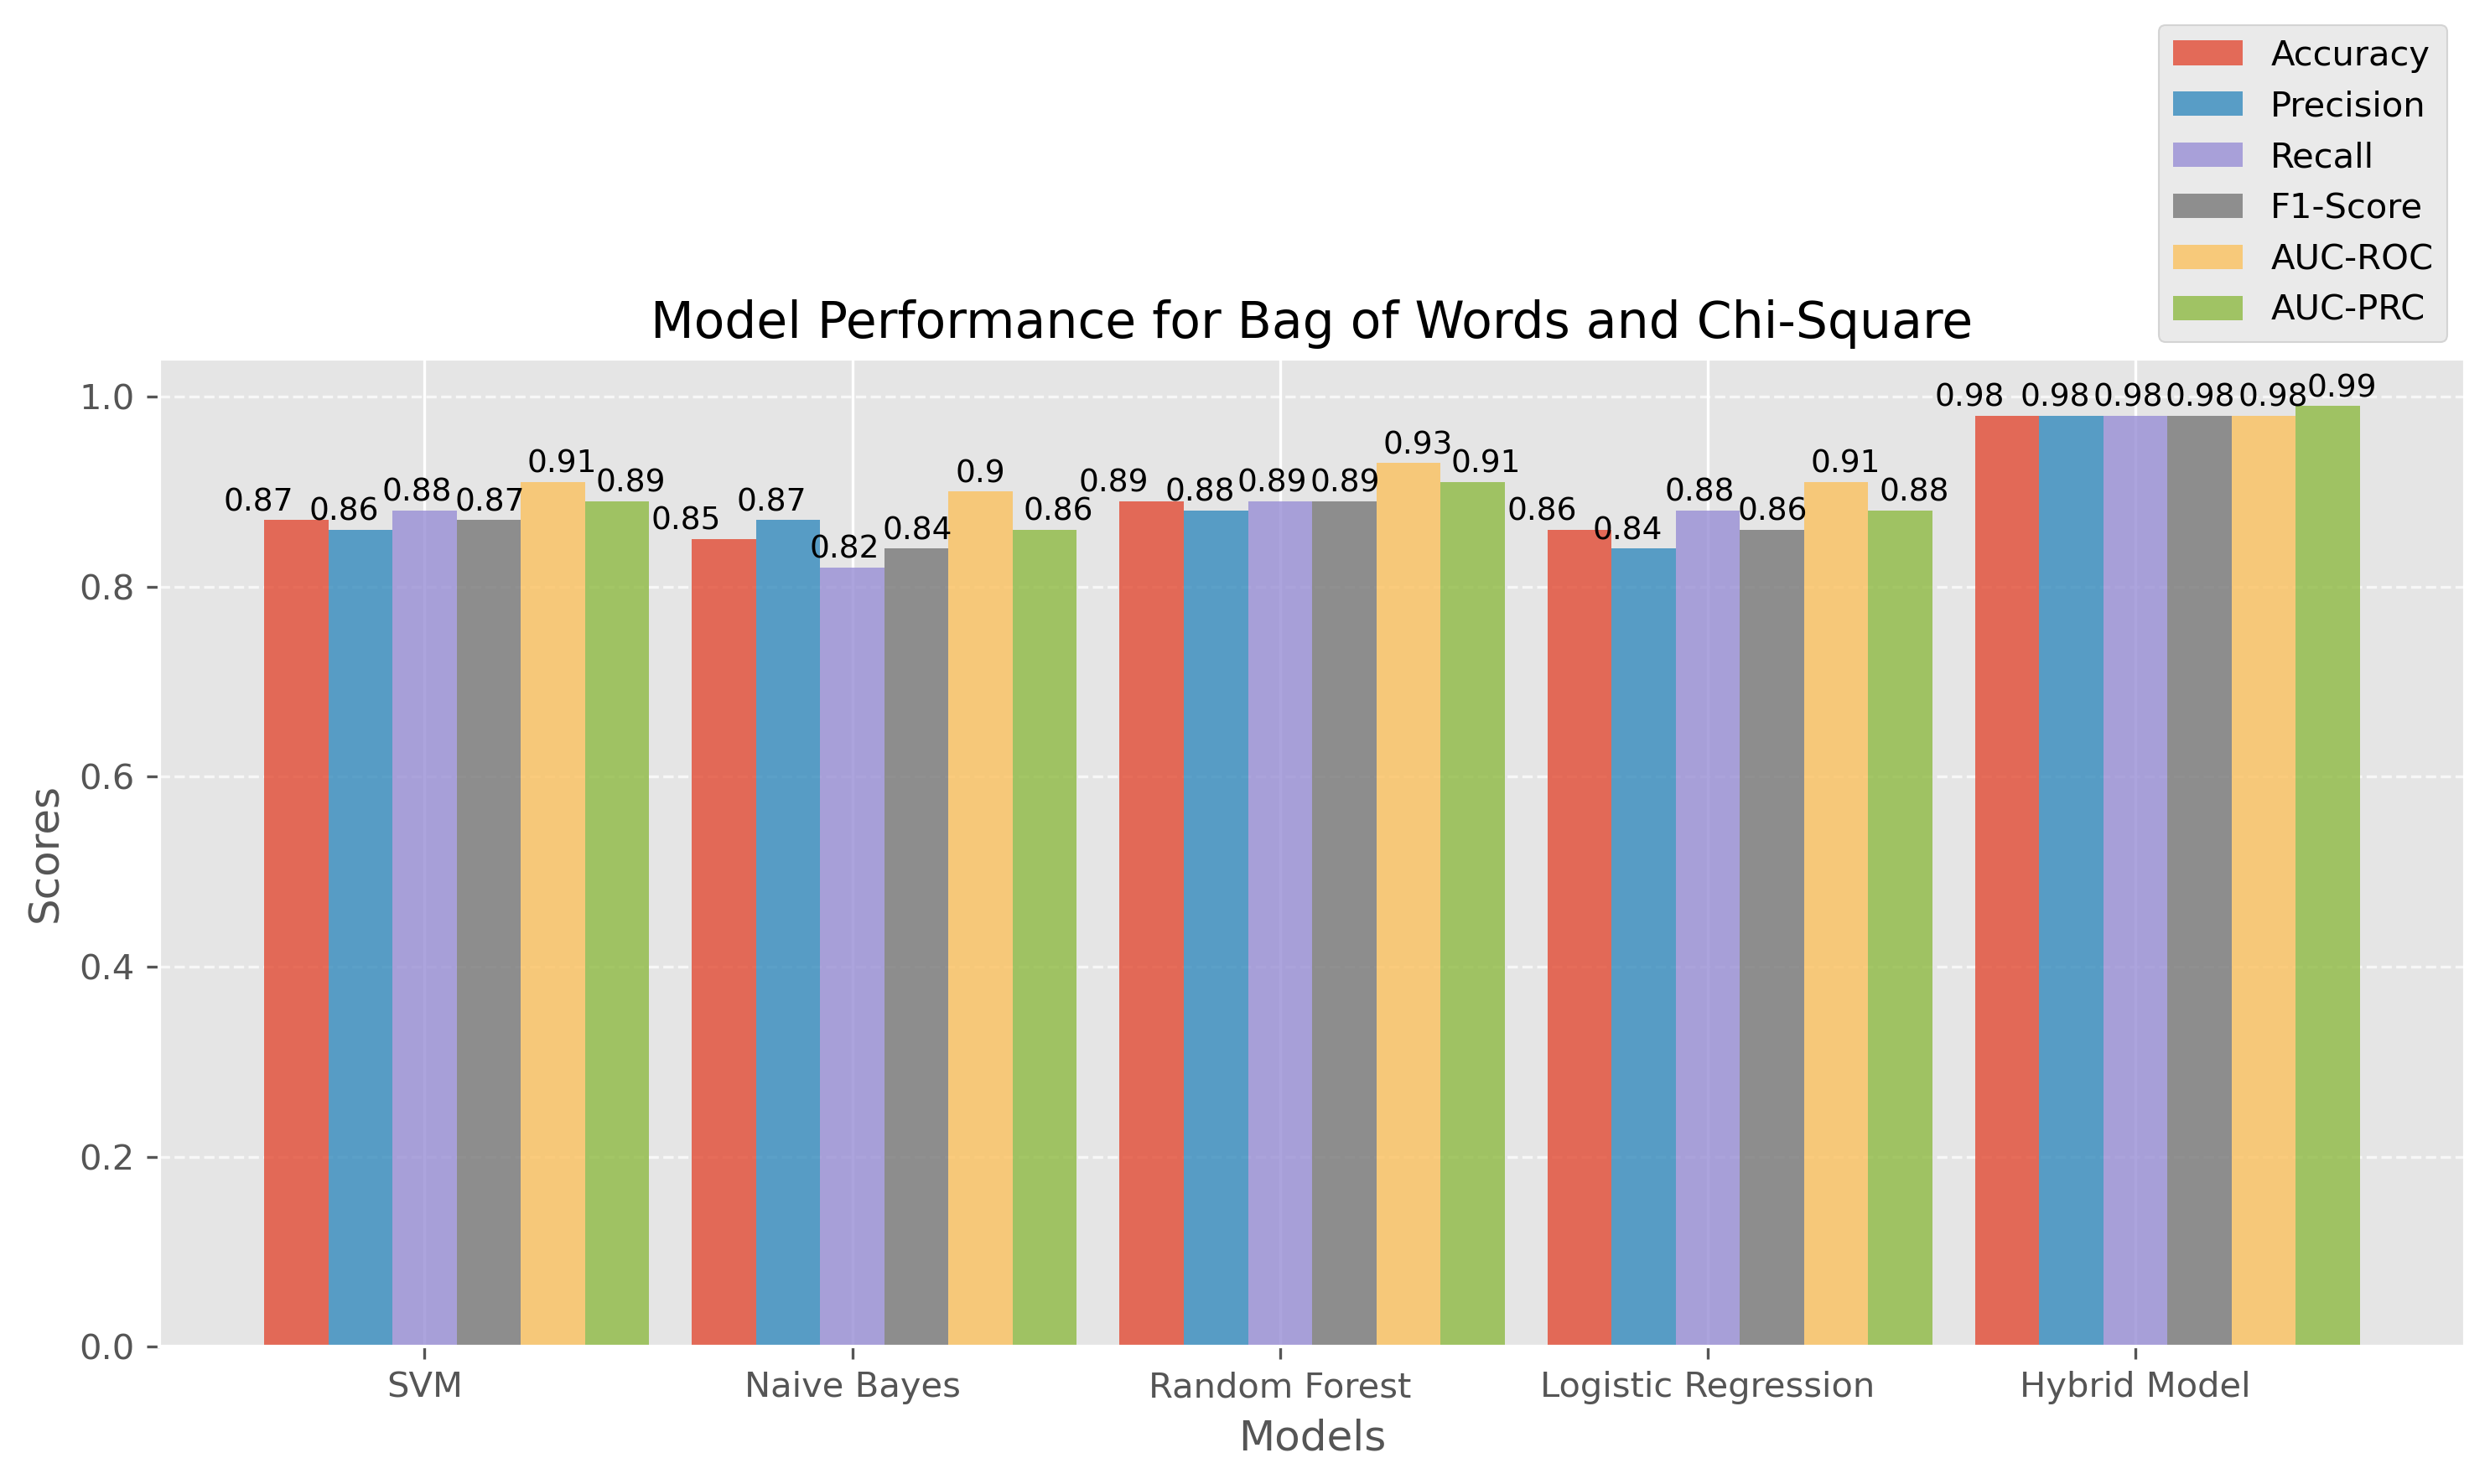

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and performance metrics
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Hybrid Model']
accuracy = [0.87, 0.85, 0.89, 0.86, 0.98]
precision = [0.86, 0.87, 0.88, 0.84, 0.98]
recall = [0.88, 0.82, 0.89, 0.88, 0.98]
f1_score = [0.87, 0.84, 0.89, 0.86, 0.98]
auc_roc = [0.91, 0.90, 0.93, 0.91, 0.98]
auc_prc = [0.89, 0.86, 0.91, 0.88, 0.99]

# Set the figure size and style
plt.figure(figsize=(10, 6), dpi = 300)
plt.style.use('ggplot')

# Define the width of each bar
bar_width = 0.15

# Create an array for the x-axis positions of the bars
x = np.arange(len(models))

# Create bar plots for each performance metric
plt.bar(x, accuracy, width=bar_width, label='Accuracy', alpha=0.8)
plt.bar(x + bar_width, precision, width=bar_width, label='Precision', alpha=0.8)
plt.bar(x + 2 * bar_width, recall, width=bar_width, label='Recall', alpha=0.8)
plt.bar(x + 3 * bar_width, f1_score, width=bar_width, label='F1-Score', alpha=0.8)
plt.bar(x + 4 * bar_width, auc_roc, width=bar_width, label='AUC-ROC', alpha=0.8)
plt.bar(x + 5 * bar_width, auc_prc, width=bar_width, label='AUC-PRC', alpha=0.8)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for Bag of Words and Chi-Square')
plt.xticks(x + 2 * bar_width, models)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, value in enumerate(accuracy):
    plt.text(i - 0.17, value + 0.01, str(value), fontsize=9)
    plt.text(i + 0.03, precision[i] + 0.01, str(precision[i]), fontsize=9)
    plt.text(i + 0.2, recall[i] + 0.01, str(recall[i]), fontsize=9)
    plt.text(i + 0.37, f1_score[i] + 0.01, str(f1_score[i]), fontsize=9)
    plt.text(i + 0.54, auc_roc[i] + 0.01, str(auc_roc[i]), fontsize=9)
    plt.text(i + 0.7, auc_prc[i] + 0.01, str(auc_prc[i]), fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


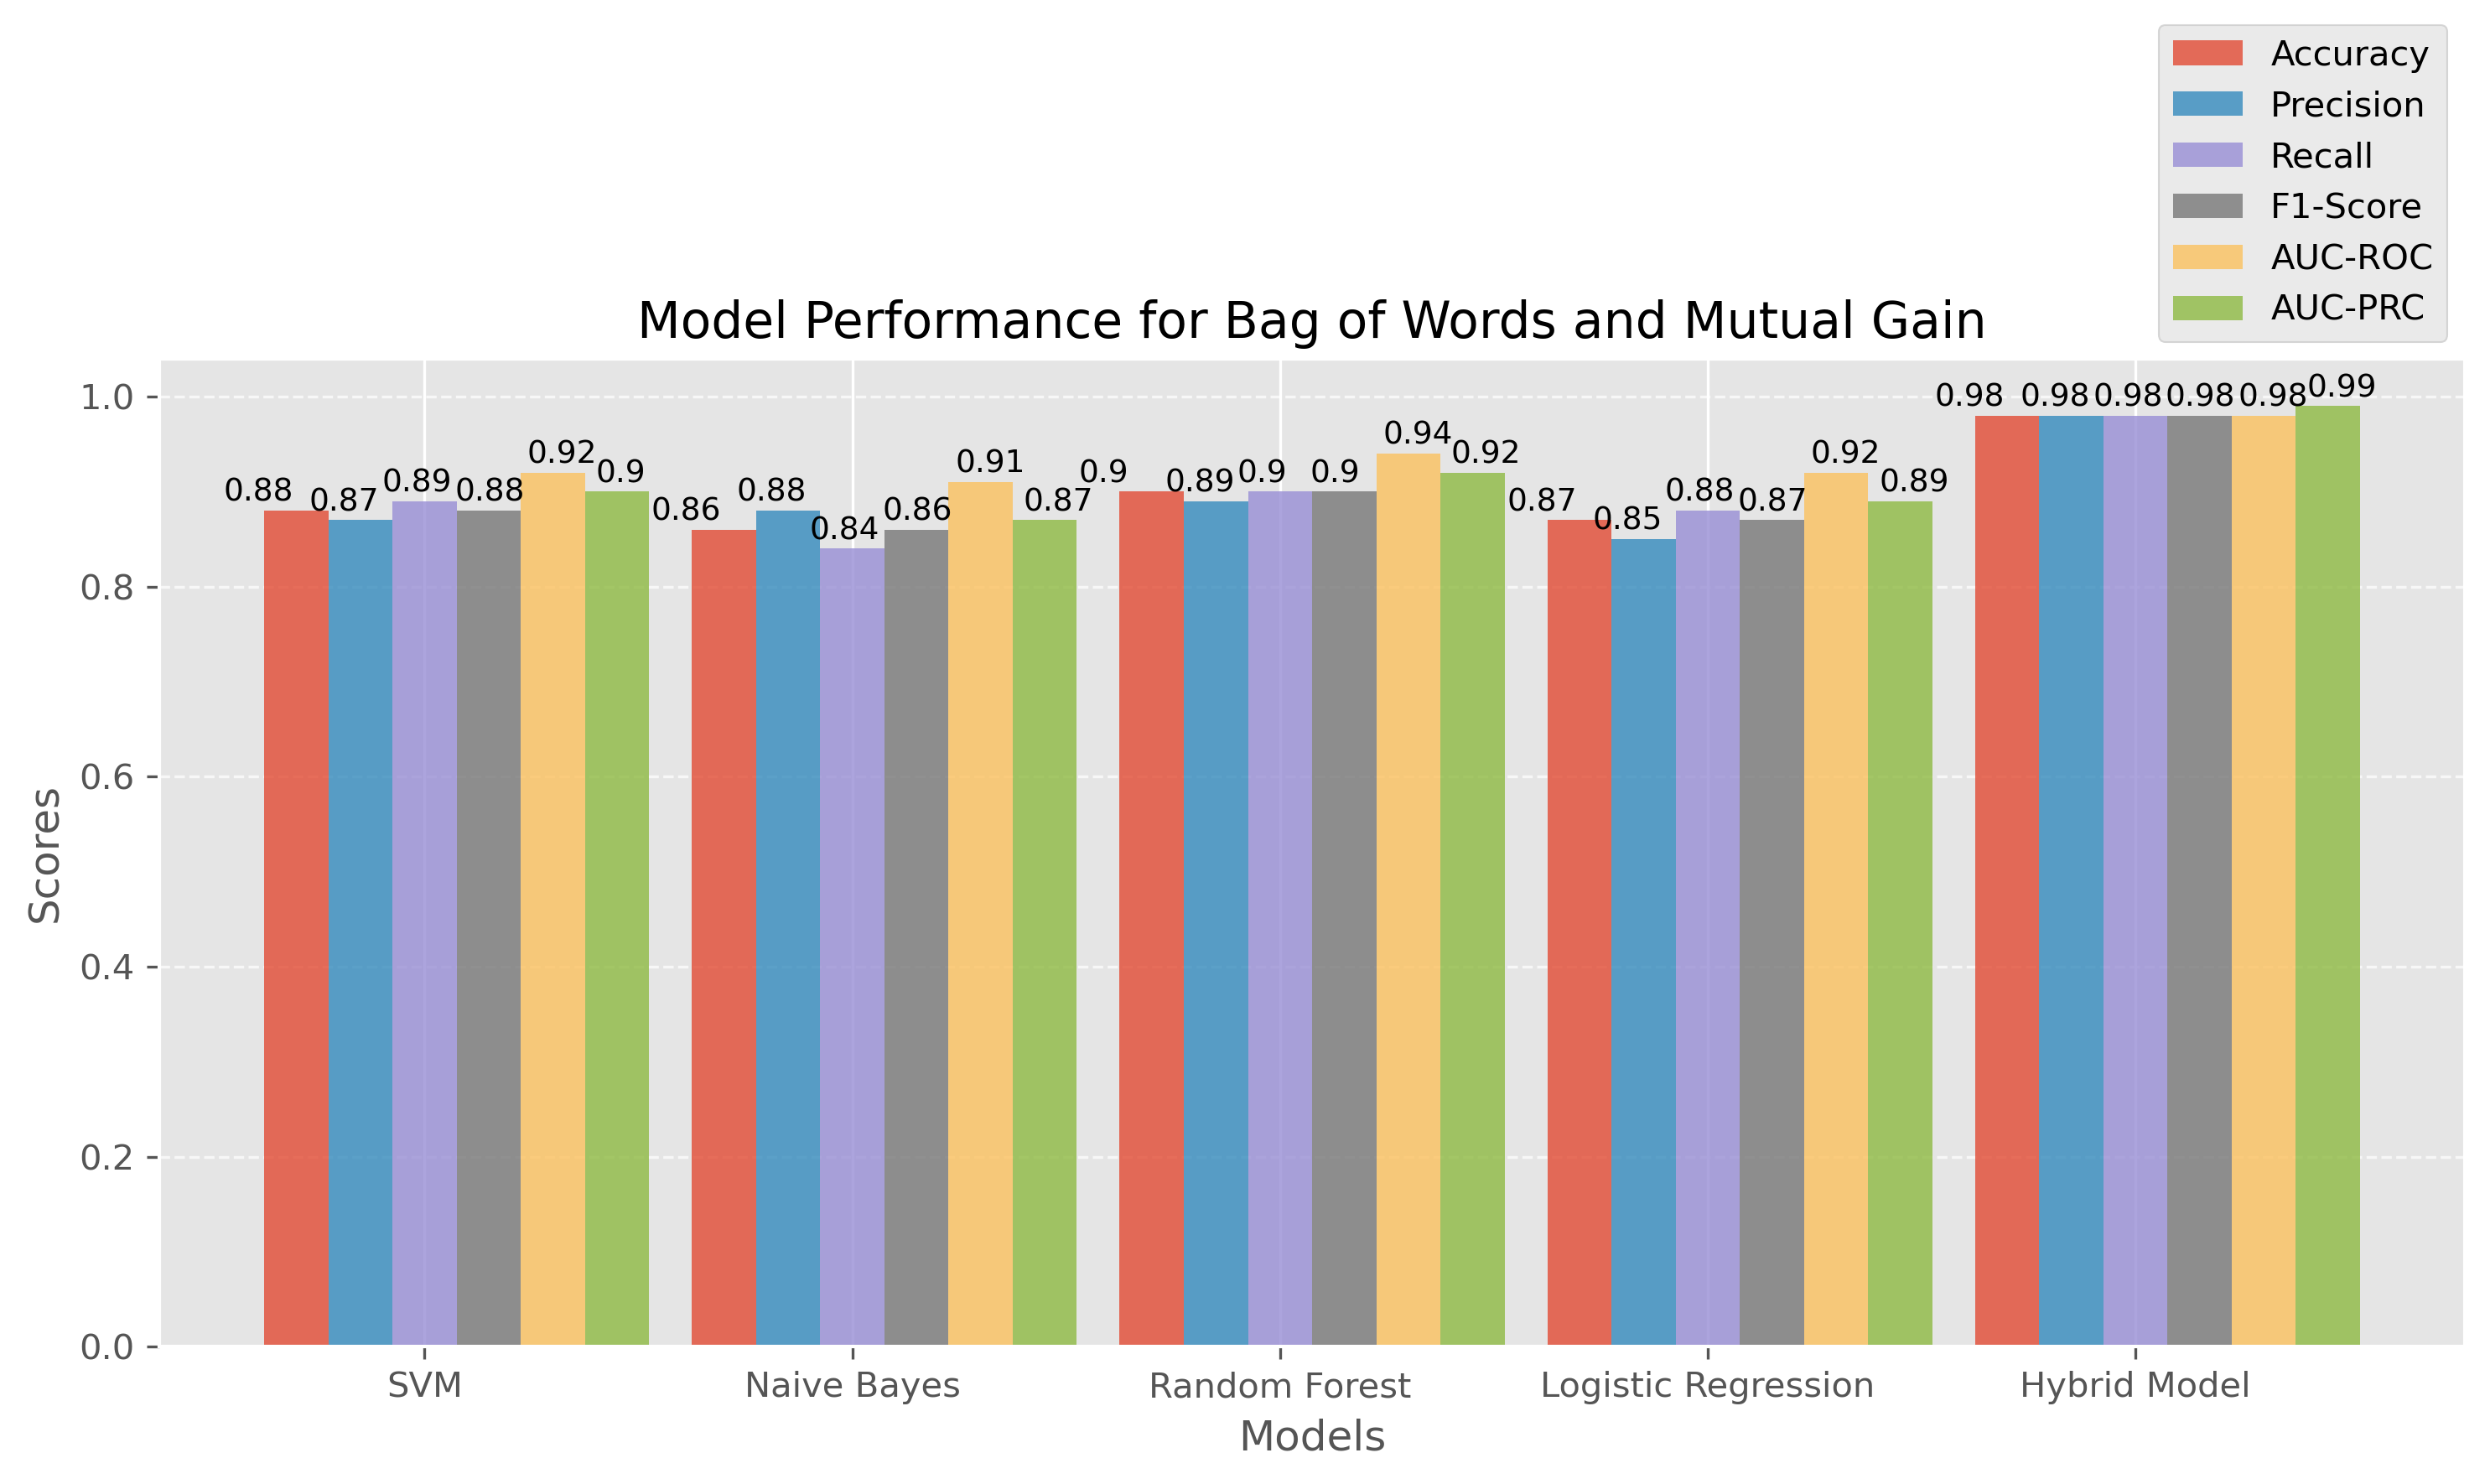

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and performance metrics
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Hybrid Model']
accuracy = [0.88, 0.86, 0.90, 0.87, 0.98]
precision = [0.87, 0.88, 0.89, 0.85, 0.98]
recall = [0.89, 0.84, 0.90, 0.88, 0.98]
f1_score = [0.88, 0.86, 0.90, 0.87, 0.98]
auc_roc = [0.92, 0.91, 0.94, 0.92, 0.98]
auc_prc = [0.90, 0.87, 0.92, 0.89, 0.99]

# Set the figure size and style
plt.figure(figsize=(10, 6), dpi = 300)
plt.style.use('ggplot')

# Define the width of each bar
bar_width = 0.15

# Create an array for the x-axis positions of the bars
x = np.arange(len(models))

# Create bar plots for each performance metric
plt.bar(x, accuracy, width=bar_width, label='Accuracy', alpha=0.8)
plt.bar(x + bar_width, precision, width=bar_width, label='Precision', alpha=0.8)
plt.bar(x + 2 * bar_width, recall, width=bar_width, label='Recall', alpha=0.8)
plt.bar(x + 3 * bar_width, f1_score, width=bar_width, label='F1-Score', alpha=0.8)
plt.bar(x + 4 * bar_width, auc_roc, width=bar_width, label='AUC-ROC', alpha=0.8)
plt.bar(x + 5 * bar_width, auc_prc, width=bar_width, label='AUC-PRC', alpha=0.8)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for Bag of Words and Mutual Gain')
plt.xticks(x + 2 * bar_width, models)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, value in enumerate(accuracy):
    plt.text(i - 0.17, value + 0.01, str(value), fontsize=9)
    plt.text(i + 0.03, precision[i] + 0.01, str(precision[i]), fontsize=9)
    plt.text(i + 0.2, recall[i] + 0.01, str(recall[i]), fontsize=9)
    plt.text(i + 0.37, f1_score[i] + 0.01, str(f1_score[i]), fontsize=9)
    plt.text(i + 0.54, auc_roc[i] + 0.01, str(auc_roc[i]), fontsize=9)
    plt.text(i + 0.7, auc_prc[i] + 0.01, str(auc_prc[i]), fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


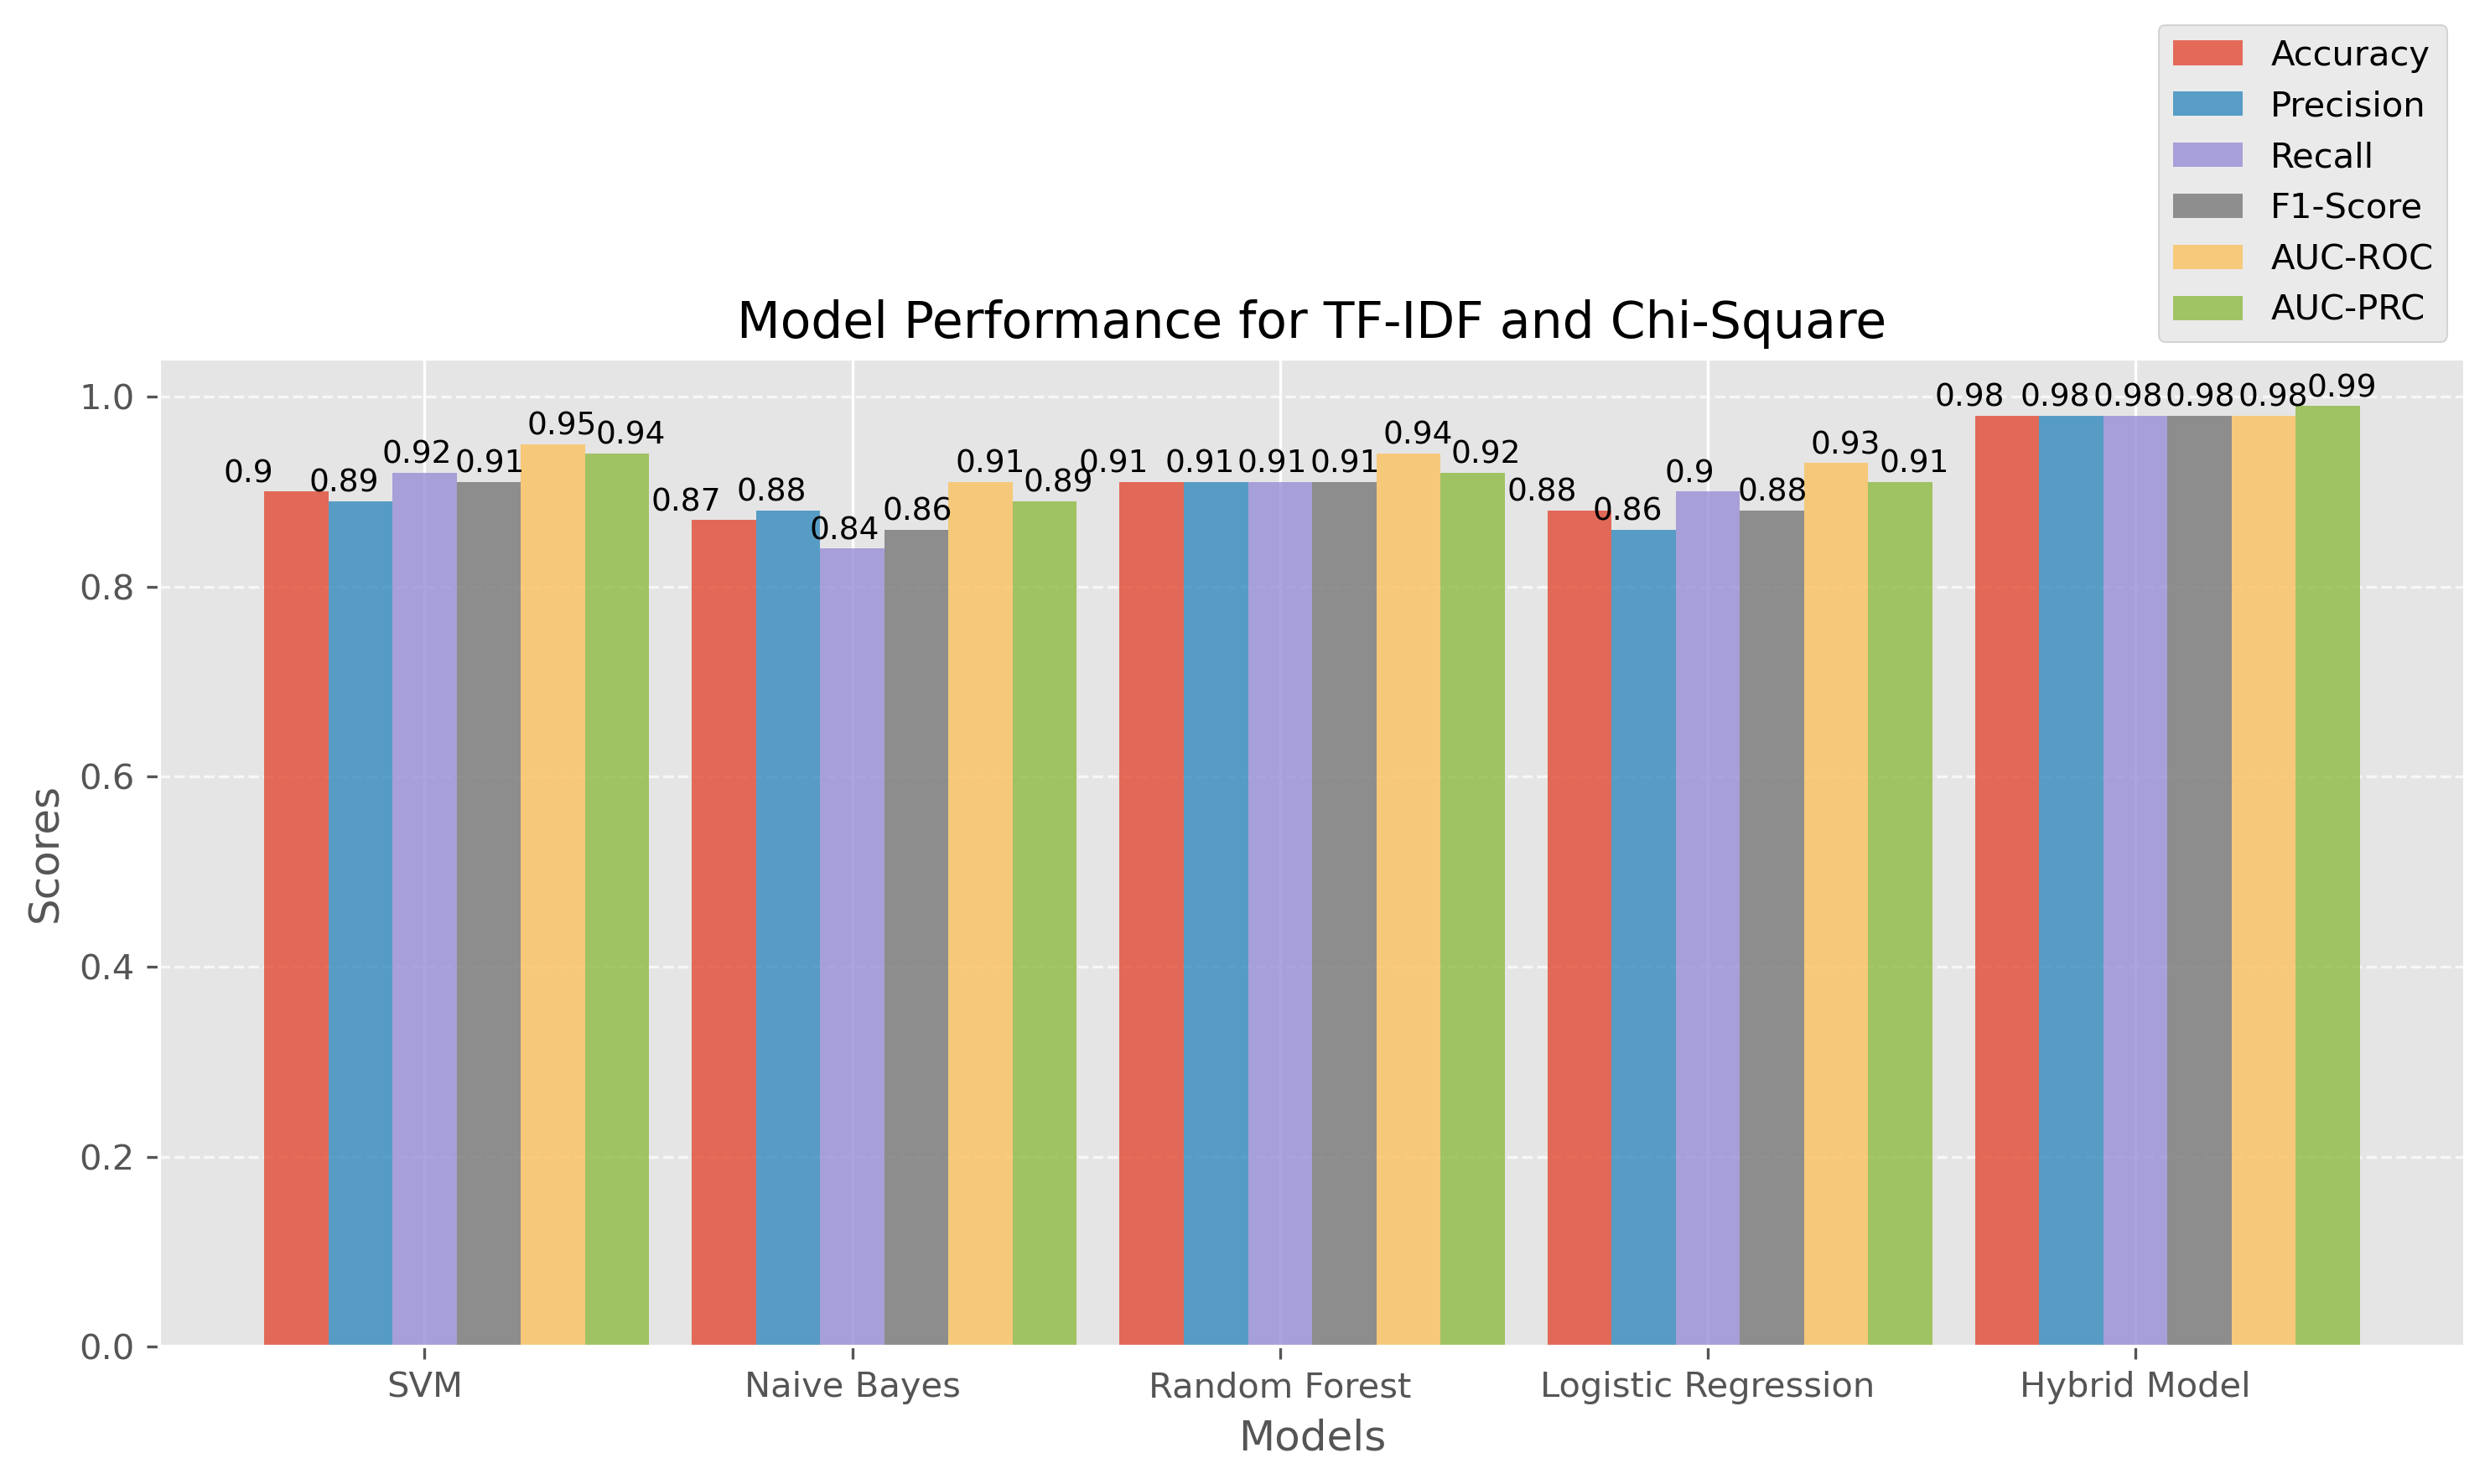

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and performance metrics
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Hybrid Model']
accuracy = [0.90, 0.87, 0.91, 0.88, 0.98]
precision = [0.89, 0.88, 0.91, 0.86, 0.98]
recall = [0.92, 0.84, 0.91, 0.90, 0.98]
f1_score = [0.91, 0.86, 0.91, 0.88, 0.98]
auc_roc = [0.95, 0.91, 0.94, 0.93, 0.98]
auc_prc = [0.94, 0.89, 0.92, 0.91, 0.99]

# Set the figure size and style
plt.figure(figsize=(10, 6), dpi = 300)
plt.style.use('ggplot')

# Define the width of each bar
bar_width = 0.15

# Create an array for the x-axis positions of the bars
x = np.arange(len(models))

# Create bar plots for each performance metric
plt.bar(x, accuracy, width=bar_width, label='Accuracy', alpha=0.8)
plt.bar(x + bar_width, precision, width=bar_width, label='Precision', alpha=0.8)
plt.bar(x + 2 * bar_width, recall, width=bar_width, label='Recall', alpha=0.8)
plt.bar(x + 3 * bar_width, f1_score, width=bar_width, label='F1-Score', alpha=0.8)
plt.bar(x + 4 * bar_width, auc_roc, width=bar_width, label='AUC-ROC', alpha=0.8)
plt.bar(x + 5 * bar_width, auc_prc, width=bar_width, label='AUC-PRC', alpha=0.8)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance for TF-IDF and Chi-Square')
plt.xticks(x + 2 * bar_width, models)
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, value in enumerate(accuracy):
    plt.text(i - 0.17, value + 0.01, str(value), fontsize=9)
    plt.text(i + 0.03, precision[i] + 0.01, str(precision[i]), fontsize=9)
    plt.text(i + 0.2, recall[i] + 0.01, str(recall[i]), fontsize=9)
    plt.text(i + 0.37, f1_score[i] + 0.01, str(f1_score[i]), fontsize=9)
    plt.text(i + 0.54, auc_roc[i] + 0.01, str(auc_roc[i]), fontsize=9)
    plt.text(i + 0.7, auc_prc[i] + 0.01, str(auc_prc[i]), fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()
